<h3>Summary

Covid-19 is a viral disease caused by a novel coronavirus that emerged in Wuhan, China in December 2019. Since then, the disease has been spreading across the globe. As of June 30, 2020,  it had infected at least 10 million people and more than 500,000 had died from the complications of the disease. The United States had been one of the hardest hit countries with more than 2.6 million cases and more than 120,000 deaths. In an effort to control the spread of the disease, the vast majority of the countries had imposed mobility control in the form of mandatory stay-at-home order and had shut down domestic and international travel by March 2020.  In addition, large sectors of economy had been shut down, including travel, entertainment, and education. As a result of those disease mitigation matters, the world economy had been hard-hit and unemployment rates skyrocketed. As the world is desperate for the understanding of the virus and the disease it causes, disease modeling is critical to eventually control the spread of the disease. 
 

<h3>1. Introduction:

Covid-19 is a viral disease caused by a novel coronavirus that emerged in Wuhan, China in December 2019. Since then, the disease has been spreading across the globe. As of June 30, 2020,  it had infected at least 10 million people and more than 500,000 had died from the complications of the disease. The United States had been one of the hardest hit countries with more than 2.6 million cases and more than 120,000 deaths. In an effort to control the spread of the disease, the vast majority of the countries had imposed mobility control in the form of mandatory stay-at-home order and had shut down domestic and international travel by March 2020.  In addition, large sectors of economy had been shut down, including travel, entertainment, and education. As a result of those disease mitigation matters, the world economy had been hard-hit and unemployment rates skyrocketed. As the world is desperate for the understanding of the virus and the disease it causes, disease modeling is critical to eventually control the spread of the disease. 


Problem Statement: 
 
We seek to predict Covid-19 hotspots based on current infection level, movement data, health ranking and social vulnerability index. Secondly, we want to predict Covid-19 case fatality rate based on health ranking and social vulnerability index. 



Datasets:

We will build our prediction based on five public available datasets in "Uncover Covid-19 Challenge" from Roche Data Science Coalition posted on www.kaggle.com . Specifically, they are

Confirmed Covid-19 cases between 1/21/2020 and 4/27/2020 in ~1800 US counties (313,110 observations, 9 features). 

Confirmed Covid-19 related deaths between 1/21/2020 and 4/27/2020 in ~1800 US counties (380,205 observations, 9 features). 

US county health rankings in 2020 in 1850 counties (3193 observations, 507 features). 

CDC social vulnerability index in 2016 in 1851 us counties(3142 observations, 127 features).

Google mobility data between 02/14/2020 and 04/10/2020 in 1711 US counties (155,060 observations, 9 features).


Questions of interest:

We will first use the training datasets to identify differential features attributable to potentially fraudulent providers. The following questions will guide the exploratory data analysis:<br>
1) What is the difference in the number of claims submitted annually between the fraudulent providers and the "honest" providers? <br>
2) What is the difference in the number of procedures per visit?<br>
3) What is the difference in the distribution of diagnosis?<br>
4) What is the relationship between the diagnosis and the procedure? 


<h3> 2. Data wrangling 

In [2]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

#display plots inline
%matplotlib inline

In [3]:
#import the raw datasets
case = pd.read_csv('/Users/zhengzhang/Downloads/confirmed-covid-19-cases-in-us-by-state-and-county.csv')
death = pd.read_csv('/Users/zhengzhang/Downloads/confirmed-covid-19-deaths-in-us-by-state-and-county.csv')
mobility= pd.read_csv('/Users/zhengzhang/Downloads/us-mobility.csv')
health= pd.read_csv('/Users/zhengzhang/Downloads/us-county-health-rankings-2020.csv')
social = pd.read_csv('/Users/zhengzhang/Downloads/cdcs-social-vulnerability-index-svi-2016-overall-svi-county-level.csv')

In [4]:
#inspect the case dataset, there are 313,110 entries, 9 variables
case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313110 entries, 0 to 313109
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   county_fips  313110 non-null  int64  
 1   county_name  313110 non-null  object 
 2   state_name   313110 non-null  object 
 3   state_fips   313110 non-null  int64  
 4   date         313110 non-null  object 
 5   confirmed    313110 non-null  int64  
 6   lat          307916 non-null  float64
 7   long         307916 non-null  float64
 8   geometry     307916 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 21.5+ MB


In [5]:
#inspect the case dataset, the first five rows
case.head()

,county_fips,county_name,state_name,state_fips,date,confirmed,lat,long,geometry
0,0,Statewide Unallocated,AL,1,2020-01-22,0,NaN,NaN,NaN
1,0,Statewide Unallocated,AL,1,2020-01-23,0,NaN,NaN,NaN
2,0,Statewide Unallocated,AL,1,2020-01-24,0,NaN,NaN,NaN
3,0,Statewide Unallocated,AL,1,2020-01-25,0,NaN,NaN,NaN
4,0,Statewide Unallocated,AL,1,2020-01-26,0,NaN,NaN,NaN


In [6]:
#inspect the case dataset missing data
case.isnull().sum()

county_fips       0
county_name       0
state_name        0
state_fips        0
date              0
confirmed         0
lat            5194
long           5194
geometry       5194
dtype: int64

In [7]:
# only keep four variables in the case dataset
case1=case[['county_name','state_name','date','confirmed']]

In [8]:
# keep only the data from individual counties
case2=case1[case1['county_name']!='Statewide Unallocated']

In [9]:
# inspect the case dataset again
case2.head()

,county_name,state_name,date,confirmed
98,Autauga County,AL,2020-01-22,0
99,Autauga County,AL,2020-01-23,0
100,Autauga County,AL,2020-01-24,0
101,Autauga County,AL,2020-01-25,0
102,Autauga County,AL,2020-01-26,0


In [10]:
# create variable "county" by taking the first word in the "county_name" variable
name=case2['county_name'].astype(str)
case2['county']=name.apply(lambda x: x.split()[0])

<ipython-input-10-a43411667bbf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  case2['county']=name.apply(lambda x: x.split()[0])


In [11]:
#inspect the case dataset again
case2.head()

,county_name,state_name,date,confirmed,county
98,Autauga County,AL,2020-01-22,0,Autauga
99,Autauga County,AL,2020-01-23,0,Autauga
100,Autauga County,AL,2020-01-24,0,Autauga
101,Autauga County,AL,2020-01-25,0,Autauga
102,Autauga County,AL,2020-01-26,0,Autauga


In [12]:
#Rename the "state" variable to "st_abbr"
case2.rename(columns={'state_name':'st_abbr'},inplace=True)

/Users/zhengzhang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [13]:
#inspect the case dataset again
case2.head()

,county_name,st_abbr,date,confirmed,county
98,Autauga County,AL,2020-01-22,0,Autauga
99,Autauga County,AL,2020-01-23,0,Autauga
100,Autauga County,AL,2020-01-24,0,Autauga
101,Autauga County,AL,2020-01-25,0,Autauga
102,Autauga County,AL,2020-01-26,0,Autauga


In [14]:
# Drop duplicated county variable
casef=case2[['county','st_abbr','date','confirmed']]
casef.head()

,county,st_abbr,date,confirmed
98,Autauga,AL,2020-01-22,0
99,Autauga,AL,2020-01-23,0
100,Autauga,AL,2020-01-24,0
101,Autauga,AL,2020-01-25,0
102,Autauga,AL,2020-01-26,0


In [15]:
# final case variable, total 308,210 observations
casef.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308210 entries, 98 to 313109
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   county     308210 non-null  object
 1   st_abbr    308210 non-null  object
 2   date       308210 non-null  object
 3   confirmed  308210 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 11.8+ MB


In [16]:
#inspect the death dataset, there are 313,110 beneficiaries, 9 variables
death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313110 entries, 0 to 313109
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   county_fips  313110 non-null  int64  
 1   county_name  313110 non-null  object 
 2   state_name   313110 non-null  object 
 3   state_fips   313110 non-null  int64  
 4   date         313110 non-null  object 
 5   deaths       313110 non-null  int64  
 6   lat          307916 non-null  float64
 7   long         307916 non-null  float64
 8   geometry     307916 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 21.5+ MB


In [17]:
#inspect the death dataset, the first five rows
death.head()

,county_fips,county_name,state_name,state_fips,date,deaths,lat,long,geometry
0,0,Statewide Unallocated,AL,1,2020-01-22,0,NaN,NaN,NaN
1,0,Statewide Unallocated,AL,1,2020-01-23,0,NaN,NaN,NaN
2,0,Statewide Unallocated,AL,1,2020-01-24,0,NaN,NaN,NaN
3,0,Statewide Unallocated,AL,1,2020-01-25,0,NaN,NaN,NaN
4,0,Statewide Unallocated,AL,1,2020-01-26,0,NaN,NaN,NaN


In [18]:
# missing data in the death dataset
death.isnull().sum()

county_fips       0
county_name       0
state_name        0
state_fips        0
date              0
deaths            0
lat            5194
long           5194
geometry       5194
dtype: int64

In [19]:
# keep four variables
death1=death[['county_name','state_name','date','deaths']]

In [20]:
# drop non-specified counties
death2=death1[death1['county_name']!='Statewide Unallocated']

In [21]:
#inspect the death dataset
death2.head()

,county_name,state_name,date,deaths
98,Autauga County,AL,2020-01-22,0
99,Autauga County,AL,2020-01-23,0
100,Autauga County,AL,2020-01-24,0
101,Autauga County,AL,2020-01-25,0
102,Autauga County,AL,2020-01-26,0


In [22]:
# creat new variable "county" by taking the first word of the "county_name"
name=death2['county_name'].astype(str)
death2['county']=name.apply(lambda x: x.split()[0])

<ipython-input-22-8230ca03d2a4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  death2['county']=name.apply(lambda x: x.split()[0])


In [23]:
#inspect the death dataset
death2.head()

,county_name,state_name,date,deaths,county
98,Autauga County,AL,2020-01-22,0,Autauga
99,Autauga County,AL,2020-01-23,0,Autauga
100,Autauga County,AL,2020-01-24,0,Autauga
101,Autauga County,AL,2020-01-25,0,Autauga
102,Autauga County,AL,2020-01-26,0,Autauga


In [24]:
# Rename the state_name ot st_abbr
death2.rename(columns={'state_name':'st_abbr'},inplace=True)

/Users/zhengzhang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [25]:
#inspect the death dataset
death2.head()

,county_name,st_abbr,date,deaths,county
98,Autauga County,AL,2020-01-22,0,Autauga
99,Autauga County,AL,2020-01-23,0,Autauga
100,Autauga County,AL,2020-01-24,0,Autauga
101,Autauga County,AL,2020-01-25,0,Autauga
102,Autauga County,AL,2020-01-26,0,Autauga


In [26]:
#finalize the death dataset
deathf=death2[['county','st_abbr','date','deaths']]
deathf.head()

,county,st_abbr,date,deaths
98,Autauga,AL,2020-01-22,0
99,Autauga,AL,2020-01-23,0
100,Autauga,AL,2020-01-24,0
101,Autauga,AL,2020-01-25,0
102,Autauga,AL,2020-01-26,0


In [27]:
#inspect the death dataset info, 308,210 observations
deathf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308210 entries, 98 to 313109
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   county   308210 non-null  object
 1   st_abbr  308210 non-null  object
 2   date     308210 non-null  object
 3   deaths   308210 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 11.8+ MB


In [28]:
#inspect the mobility dataset, there are 155,060 claims, 9 variables
mobility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155060 entries, 0 to 155059
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   state                 155060 non-null  object 
 1   county                155060 non-null  object 
 2   date                  155060 non-null  object 
 3   retail                133393 non-null  float64
 4   grocery_and_pharmacy  129022 non-null  float64
 5   parks                 40611 non-null   float64
 6   transit_stations      59546 non-null   float64
 7   workplaces            146031 non-null  float64
 8   residential           72058 non-null   float64
dtypes: float64(6), object(3)
memory usage: 10.6+ MB


In [29]:
#inspect the mobility dataset, the first five rows
mobility.head()

,state,county,date,retail,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,Total,Total,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1,Total,Total,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
2,Total,Total,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
3,Total,Total,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
4,Total,Total,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0


In [30]:
#inspect the mobility dataset missing data
mobility.isnull().sum()

state                        0
county                       0
date                         0
retail                   21667
grocery_and_pharmacy     26038
parks                   114449
transit_stations         95514
workplaces                9029
residential              83002
dtype: int64

In [31]:
#delete the "total" rows
mobility1=mobility[mobility['county']!='Total']

In [32]:
#inspect the mobility1.head()
mobility1.head()

,state,county,date,retail,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
114,Alabama,Autauga County,2020-02-15,5.0,7.0,NaN,NaN,-4.0,NaN
115,Alabama,Autauga County,2020-02-16,0.0,1.0,-23.0,NaN,-4.0,NaN
116,Alabama,Autauga County,2020-02-17,8.0,0.0,NaN,NaN,-27.0,5.0
117,Alabama,Autauga County,2020-02-18,-2.0,0.0,NaN,NaN,2.0,0.0
118,Alabama,Autauga County,2020-02-19,-2.0,0.0,NaN,NaN,2.0,0.0


In [33]:
# keep the first word of the variable "county"
name=mobility1['county'].astype(str)
mobility1['county']=name.apply(lambda x: x.split()[0])

<ipython-input-33-e1063ed65765>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mobility1['county']=name.apply(lambda x: x.split()[0])


In [34]:
#inspect mobility1
mobility1.head()

,state,county,date,retail,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
114,Alabama,Autauga,2020-02-15,5.0,7.0,NaN,NaN,-4.0,NaN
115,Alabama,Autauga,2020-02-16,0.0,1.0,-23.0,NaN,-4.0,NaN
116,Alabama,Autauga,2020-02-17,8.0,0.0,NaN,NaN,-27.0,5.0
117,Alabama,Autauga,2020-02-18,-2.0,0.0,NaN,NaN,2.0,0.0
118,Alabama,Autauga,2020-02-19,-2.0,0.0,NaN,NaN,2.0,0.0


In [35]:
#inspect mobility1
mobility1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152096 entries, 114 to 155059
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   state                 152096 non-null  object 
 1   county                152096 non-null  object 
 2   date                  152096 non-null  object 
 3   retail                130429 non-null  float64
 4   grocery_and_pharmacy  126058 non-null  float64
 5   parks                 37647 non-null   float64
 6   transit_stations      56582 non-null   float64
 7   workplaces            143067 non-null  float64
 8   residential           69094 non-null   float64
dtypes: float64(6), object(3)
memory usage: 11.6+ MB


In [36]:
#define the final mobility dataset, mobilityf
#change the state name to upper case
mobilityf=mobility1
mobilityf.state=mobilityf['state'].str.upper()

/Users/zhengzhang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [37]:
#inspect the mobilityf
mobilityf.head()

,state,county,date,retail,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
114,ALABAMA,Autauga,2020-02-15,5.0,7.0,NaN,NaN,-4.0,NaN
115,ALABAMA,Autauga,2020-02-16,0.0,1.0,-23.0,NaN,-4.0,NaN
116,ALABAMA,Autauga,2020-02-17,8.0,0.0,NaN,NaN,-27.0,5.0
117,ALABAMA,Autauga,2020-02-18,-2.0,0.0,NaN,NaN,2.0,0.0
118,ALABAMA,Autauga,2020-02-19,-2.0,0.0,NaN,NaN,2.0,0.0


In [38]:
#inspect the health dataset, there are 3193 entires, 507 variables
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3193 entries, 0 to 3192
Columns: 507 entries, fips to percent_rural
dtypes: float64(485), int64(14), object(8)
memory usage: 12.4+ MB


In [39]:
#inspect the health dataset the first five rows
health.head()

,fips,state,county,num_deaths,years_of_potential_life_lost_rate,95percent_ci_low,95percent_ci_high,quartile,ypll_rate_aian,ypll_rate_aian_95percent_ci_low,...,percent_hispanic,num_non_hispanic_white,percent_non_hispanic_white,num_not_proficient_in_english,percent_not_proficient_in_english,95percent_ci_low_39,95percent_ci_high_39,percent_female,num_rural,percent_rural
0,1000,Alabama,NaN,81791.0,9942.794666,9840.535949,10045.053384,NaN,NaN,NaN,...,4.443264,3197324,65.413428,48517,1.061048,1.006759,1.115337,51.633032,1957932.0,40.963183
1,1001,Alabama,Autauga,791.0,8128.591190,7283.340731,8973.841649,1.0,NaN,NaN,...,2.965774,41316,74.308016,426,0.820225,0.347891,1.292558,51.448715,22921.0,42.002162
2,1003,Alabama,Baldwin,2967.0,7354.122530,6918.554269,7789.690790,1.0,NaN,NaN,...,4.646779,181201,83.111337,1068,0.543517,0.347271,0.739763,51.538377,77060.0,42.279099
3,1005,Alabama,Barbour,472.0,10253.573403,8782.217281,11724.929524,2.0,NaN,NaN,...,4.276355,11356,45.641252,398,1.631683,0.824903,2.438462,47.216752,18613.0,67.789635
4,1007,Alabama,Bibb,471.0,11977.539484,10344.064842,13611.014126,3.0,NaN,NaN,...,2.625000,16708,74.589286,57,0.268210,0.000000,0.807504,46.781250,15663.0,68.352607


In [40]:
#check for missing data
health.isnull().sum()

fips                                   0
state                                  0
county                                51
num_deaths                           293
years_of_potential_life_lost_rate    293
                                    ... 
95percent_ci_low_39                  155
95percent_ci_high_39                 155
percent_female                         0
num_rural                              7
percent_rural                          7
Length: 507, dtype: int64

In [41]:
#keep selected variables in the health dataset
health1=health[['state','county','num_deaths','years_of_potential_life_lost_rate','percent_fair_or_poor_health','percent_low_birthweight',
              'percent_smokers','percent_driving_deaths_with_alcohol_involvement','percent_adults_with_obesity','percent_physically_inactive',
               'percent_excessive_drinking','percent_uninsured','primary_care_physicians_rate','percent_severe_housing_problems','life_expectancy','percent_homeowners',
               'percent_rural']]
health1.isnull().sum()

state                                                0
county                                              51
num_deaths                                         293
years_of_potential_life_lost_rate                  293
percent_fair_or_poor_health                          0
percent_low_birthweight                            107
percent_smokers                                      0
percent_driving_deaths_with_alcohol_involvement     35
percent_adults_with_obesity                          0
percent_physically_inactive                          0
percent_excessive_drinking                           0
percent_uninsured                                    1
primary_care_physicians_rate                       147
percent_severe_housing_problems                      0
life_expectancy                                     73
percent_homeowners                                   0
percent_rural                                        7
dtype: int64

In [42]:
#drop counties with missing name, change state name to upper case
healthf=health1.dropna(subset=['county'])
healthf.state=healthf['state'].str.upper()

/Users/zhengzhang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [43]:
#inspect healthf 
healthf.head()

,state,county,num_deaths,years_of_potential_life_lost_rate,percent_fair_or_poor_health,percent_low_birthweight,percent_smokers,percent_driving_deaths_with_alcohol_involvement,percent_adults_with_obesity,percent_physically_inactive,percent_excessive_drinking,percent_uninsured,primary_care_physicians_rate,percent_severe_housing_problems,life_expectancy,percent_homeowners,percent_rural
1,ALABAMA,Autauga,791.0,8128.591190,20.882987,8.619529,18.081557,26.785714,33.3,34.7,15.026031,8.721686,45.04180,14.663462,76.879477,74.894625,42.002162
2,ALABAMA,Baldwin,2967.0,7354.122530,17.509134,8.345003,17.489033,30.769231,31.0,26.5,17.958310,11.333404,72.89727,13.566201,78.450258,73.619343,42.279099
3,ALABAMA,Barbour,472.0,10253.573403,29.591802,11.474559,21.999985,40.000000,41.7,23.5,12.844016,12.242792,31.65809,14.583333,75.341935,61.397779,67.789635
4,ALABAMA,Bibb,471.0,11977.539484,19.439724,10.308710,19.114200,27.586207,37.6,33.5,15.570042,10.206253,48.52656,10.496454,73.571820,75.073099,68.352607
5,ALABAMA,Blount,1085.0,11335.071134,21.745293,7.604563,19.208672,19.444444,33.8,30.3,14.230594,13.360759,22.40877,10.548012,74.145826,78.626214,89.951502


In [44]:
#inspect healthf
healthf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3142 entries, 1 to 3192
Data columns (total 17 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   state                                            3142 non-null   object 
 1   county                                           3142 non-null   object 
 2   num_deaths                                       2849 non-null   float64
 3   years_of_potential_life_lost_rate                2849 non-null   float64
 4   percent_fair_or_poor_health                      3142 non-null   float64
 5   percent_low_birthweight                          3035 non-null   float64
 6   percent_smokers                                  3142 non-null   float64
 7   percent_driving_deaths_with_alcohol_involvement  3107 non-null   float64
 8   percent_adults_with_obesity                      3142 non-null   float64
 9   percent_physically_inactive   

In [45]:
#inspect social dataset, 3142 entries, 127 variables
social.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Columns: 127 entries, geometry to shape_len
dtypes: float64(63), int64(39), object(25)
memory usage: 3.0+ MB


In [46]:
#inspect social dataset
social.head()

,geometry,st,state,st_abbr,county,fips,location,area_sqmi,e_totpop,m_totpop,...,f_theme4,f_total,e_uninsur,m_uninsur,ep_uninsur,mp_uninsur,e_daypop,objectid,shape_are,shape_len
0,"POLYGON ((-86.9212008685 32.6575481071, -86.92...",1,ALABAMA,AL,Autauga,1001,"Autauga County, Alabama",594.446120,55049,0,...,f,f,4852,649,8.9,1.2,40854,1,0.150260,2.052636
1,"POLYGON ((-86.963362945 33.8582273591, -86.959...",1,ALABAMA,AL,Blount,1009,"Blount County, Alabama",644.806508,57704,0,...,f,f,6388,740,11.2,1.3,42597,2,0.164406,2.392672
2,"POLYGON ((-85.5934395044 32.8972732071, -85.59...",1,ALABAMA,AL,Chambers,1017,"Chambers County, Alabama",596.531112,34018,0,...,f,f,3979,544,11.8,1.6,27940,3,0.150587,1.714193
3,"POLYGON ((-86.1963696041 31.4254368653, -86.19...",1,ALABAMA,AL,Coffee,1031,"Coffee County, Alabama",678.985652,50991,0,...,f,f,5253,464,10.7,0.9,47236,4,0.167192,1.678611
4,"POLYGON ((-88.1392513191 34.5878014617, -88.13...",1,ALABAMA,AL,Colbert,1033,"Colbert County, Alabama",592.619664,54377,0,...,f,f,4932,458,9.1,0.8,56227,5,0.158869,2.175068


In [47]:
#checking missing values
social.isnull().sum()

geometry      0
st            0
state         0
st_abbr       0
county        0
             ..
mp_uninsur    0
e_daypop      0
objectid      0
shape_are     0
shape_len     0
Length: 127, dtype: int64

In [49]:
social1=social[['state','st_abbr','county','ep_pov','ep_unemp','ep_age65','ep_minrty']]
social1.isnull().sum()

state        0
st_abbr      0
county       0
ep_pov       0
ep_unemp     0
ep_age65     0
ep_minrty    0
dtype: int64

In [50]:
#inspect social dataset
social1.head()

,state,st_abbr,county,ep_pov,ep_unemp,ep_age65,ep_minrty
0,ALABAMA,AL,Autauga,12.3,5.6,14.0,24.3
1,ALABAMA,AL,Blount,16.5,6.0,17.2,12.3
2,ALABAMA,AL,Chambers,20.3,7.5,18.4,43.3
3,ALABAMA,AL,Coffee,16.4,6.2,15.8,28.6
4,ALABAMA,AL,Colbert,16.5,7.5,18.5,21.1


In [51]:
#define final social dataset
socialf=social1

<h4> 2a. Handling null values

<h4> 3. Exploratory data analysis

<h5> 3a. Univariate Analysis

In [52]:
# Check the total number of states, there are 51 states and DC
casef['st_abbr'].value_counts()

TX    24892
GA    15582
VA    13034
KY    11760
MO    11270
KS    10290
IL     9996
NC     9800
IA     9702
TN     9310
NE     9114
IN     9016
OH     8624
MN     8526
MI     8134
MS     8036
OK     7546
AR     7350
WI     7056
PA     6566
AL     6566
FL     6566
SD     6468
LA     6272
CO     6272
NY     6174
CA     5782
MT     5488
WV     5390
ND     5194
SC     4508
ID     4312
WA     3822
OR     3528
NM     3234
AK     2940
UT     2842
MD     2352
WY     2254
NJ     2058
NV     1666
ME     1568
AZ     1470
MA     1372
VT     1372
NH      980
CT      784
RI      490
HI      490
DE      294
DC       98
Name: st_abbr, dtype: int64

In [53]:
len(casef['st_abbr'].value_counts())

51

In [54]:
#There are 98 days worth of data, from Jan 22 to April 28, 2020
casef['date'].value_counts()

2020-03-12    3145
2020-03-07    3145
2020-03-13    3145
2020-04-04    3145
2020-04-28    3145
              ... 
2020-04-20    3145
2020-02-03    3145
2020-03-08    3145
2020-01-22    3145
2020-03-06    3145
Name: date, Length: 98, dtype: int64

In [55]:
#end date
casef['date'].max()

'2020-04-28'

In [56]:
#beginning date
casef['date'].min()

'2020-01-22'

In [57]:
#There are 3145 counties
casef['st_abbr'][casef['date']=='2020-01-22'].value_counts()

TX    254
GA    159
VA    133
KY    120
MO    115
KS    105
IL    102
NC    100
IA     99
TN     95
NE     93
IN     92
OH     88
MN     87
MI     83
MS     82
OK     77
AR     75
WI     72
PA     67
FL     67
AL     67
SD     66
CO     64
LA     64
NY     63
CA     59
MT     56
WV     55
ND     53
SC     46
ID     44
WA     39
OR     36
NM     33
AK     30
UT     29
MD     24
WY     23
NJ     21
NV     17
ME     16
AZ     15
VT     14
MA     14
NH     10
CT      8
HI      5
RI      5
DE      3
DC      1
Name: st_abbr, dtype: int64

In [58]:
#There are 3145 counties
sum(casef['st_abbr'][casef['date']=='2020-01-22'].value_counts())

3145

In [59]:
# Check the total number of states, there are 50 states
mobilityf['state'].value_counts()

TEXAS             11801
GEORGIA            8151
VIRGINIA           7251
KENTUCKY           5751
MISSOURI           5560
NORTH CAROLINA     5516
ILLINOIS           5228
INDIANA            5153
IOWA               5107
TENNESSEE          5096
OHIO               4990
MICHIGAN           4448
MINNESOTA          4413
MISSISSIPPI        4188
WISCONSIN          3944
ARKANSAS           3835
FLORIDA            3780
ALABAMA            3768
OKLAHOMA           3703
PENNSYLVANIA       3669
NEW YORK           3477
LOUISIANA          3463
KANSAS             3314
CALIFORNIA         3174
NEBRASKA           2632
COLORADO           2625
SOUTH CAROLINA     2594
WEST VIRGINIA      2487
WASHINGTON         1992
IDAHO              1971
OREGON             1889
MONTANA            1634
NEW MEXICO         1629
SOUTH DAKOTA       1478
MARYLAND           1368
UTAH               1335
NEW JERSEY         1197
WYOMING            1110
NORTH DAKOTA       1105
MAINE               912
ARIZONA             854
MASSACHUSETTS   

In [60]:
len(mobilityf['state'].value_counts())

50

In [61]:
#different number of counties in each date
mobilityf['date'].value_counts()

2020-04-02    2789
2020-03-31    2784
2020-04-01    2782
2020-03-26    2781
2020-04-09    2781
2020-04-07    2780
2020-04-08    2778
2020-03-25    2777
2020-03-24    2775
2020-03-30    2770
2020-04-03    2768
2020-03-19    2763
2020-03-18    2763
2020-03-23    2763
2020-04-06    2759
2020-03-27    2759
2020-03-20    2757
2020-04-10    2757
2020-03-17    2754
2020-02-17    2744
2020-02-19    2729
2020-02-20    2727
2020-03-11    2724
2020-02-25    2724
2020-02-18    2723
2020-03-04    2722
2020-03-12    2721
2020-03-16    2721
2020-02-26    2720
2020-02-27    2719
2020-03-05    2718
2020-03-03    2718
2020-03-10    2716
2020-03-13    2710
2020-03-06    2708
2020-02-21    2708
2020-02-24    2706
2020-03-09    2703
2020-02-28    2703
2020-03-02    2701
2020-04-04    2585
2020-03-28    2585
2020-03-21    2569
2020-02-22    2561
2020-02-15    2560
2020-02-29    2550
2020-03-14    2550
2020-03-07    2545
2020-04-05    2496
2020-03-29    2488
2020-03-22    2476
2020-02-16    2452
2020-02-23  

In [62]:
#total 57 days
len(mobilityf['date'].value_counts())

57

In [63]:
mobilityf['date'].min()

'2020-02-15'

In [64]:
mobilityf['date'].max()

'2020-04-11'

In [65]:
counties=mobilityf['county'].groupby([mobilityf['date'],mobilityf['state']]).value_counts()

In [66]:
counties.unstack().sum(axis=1)

date        state        
2020-02-15  ALABAMA           66.0
            ALASKA             7.0
            ARIZONA           15.0
            ARKANSAS          64.0
            CALIFORNIA        55.0
                             ...  
2020-04-11  VIRGINIA         106.0
            WASHINGTON        33.0
            WEST VIRGINIA     35.0
            WISCONSIN         64.0
            WYOMING           14.0
Length: 2850, dtype: float64

In [67]:
counties_sum=counties.unstack().sum(axis=1)

In [68]:
counties_sum.unstack()

state,ALABAMA,ALASKA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,FLORIDA,GEORGIA,...,SOUTH DAKOTA,TENNESSEE,TEXAS,UTAH,VERMONT,VIRGINIA,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING
date,,,,,,,,,,,,,,,,,,,,,
2020-02-15,66.0,7.0,15.0,64.0,55.0,44.0,8.0,3.0,66.0,141.0,...,18.0,87.0,204.0,23.0,12.0,124.0,34.0,38.0,69.0,19.0
2020-02-16,65.0,7.0,15.0,60.0,55.0,44.0,8.0,3.0,66.0,135.0,...,15.0,85.0,203.0,20.0,12.0,122.0,34.0,38.0,65.0,16.0
2020-02-17,67.0,12.0,15.0,71.0,56.0,46.0,8.0,3.0,67.0,146.0,...,32.0,91.0,209.0,24.0,13.0,130.0,36.0,45.0,69.0,20.0
2020-02-18,67.0,10.0,15.0,70.0,56.0,46.0,8.0,3.0,66.0,145.0,...,25.0,90.0,209.0,24.0,13.0,129.0,35.0,45.0,69.0,20.0
2020-02-19,67.0,10.0,15.0,70.0,56.0,48.0,8.0,3.0,67.0,146.0,...,26.0,90.0,210.0,24.0,13.0,129.0,35.0,45.0,70.0,20.0
2020-02-20,67.0,10.0,15.0,69.0,56.0,47.0,8.0,3.0,67.0,145.0,...,26.0,91.0,210.0,24.0,13.0,129.0,35.0,45.0,70.0,20.0
2020-02-21,67.0,10.0,15.0,68.0,56.0,45.0,8.0,3.0,67.0,144.0,...,27.0,88.0,212.0,24.0,13.0,129.0,35.0,46.0,71.0,20.0
2020-02-22,66.0,8.0,15.0,64.0,55.0,44.0,8.0,3.0,66.0,140.0,...,18.0,87.0,207.0,25.0,12.0,123.0,34.0,38.0,69.0,19.0
2020-02-23,64.0,7.0,15.0,60.0,55.0,44.0,8.0,3.0,65.0,134.0,...,16.0,85.0,203.0,19.0,12.0,121.0,34.0,38.0,65.0,15.0


In [69]:
counties_sum.unstack().sum(axis=1)

date
2020-02-15    2560.0
2020-02-16    2452.0
2020-02-17    2744.0
2020-02-18    2723.0
2020-02-19    2729.0
2020-02-20    2727.0
2020-02-21    2708.0
2020-02-22    2561.0
2020-02-23    2447.0
2020-02-24    2706.0
2020-02-25    2724.0
2020-02-26    2720.0
2020-02-27    2719.0
2020-02-28    2703.0
2020-02-29    2550.0
2020-03-01    2421.0
2020-03-02    2701.0
2020-03-03    2718.0
2020-03-04    2722.0
2020-03-05    2718.0
2020-03-06    2708.0
2020-03-07    2545.0
2020-03-08    2428.0
2020-03-09    2703.0
2020-03-10    2716.0
2020-03-11    2724.0
2020-03-12    2721.0
2020-03-13    2710.0
2020-03-14    2550.0
2020-03-15    2427.0
2020-03-16    2721.0
2020-03-17    2754.0
2020-03-18    2763.0
2020-03-19    2763.0
2020-03-20    2757.0
2020-03-21    2569.0
2020-03-22    2476.0
2020-03-23    2763.0
2020-03-24    2775.0
2020-03-25    2777.0
2020-03-26    2781.0
2020-03-27    2759.0
2020-03-28    2585.0
2020-03-29    2488.0
2020-03-30    2770.0
2020-03-31    2784.0
2020-04-01    2782.0
2020-04-

In [70]:
unique_counties=mobilityf['county'].groupby(mobilityf['state']).unique()
unique_counties

state
ALABAMA           [Autauga, Baldwin, Barbour, Bibb, Blount, Bull...
ALASKA            [Anchorage, Bethel, Fairbanks, Juneau, Kenai, ...
ARIZONA           [Apache, Cochise, Coconino, Gila, Graham, Gree...
ARKANSAS          [Arkansas, Ashley, Baxter, Benton, Boone, Brad...
CALIFORNIA        [Alameda, Amador, Butte, Calaveras, Colusa, Co...
COLORADO          [Adams, Alamosa, Arapahoe, Archuleta, Bent, Bo...
CONNECTICUT       [Fairfield, Hartford, Litchfield, Middlesex, N...
DELAWARE                                        [Kent, New, Sussex]
FLORIDA           [Alachua, Baker, Bay, Bradford, Brevard, Browa...
GEORGIA           [Appling, Atkinson, Bacon, Baldwin, Banks, Bar...
HAWAII                              [Hawaii, Honolulu, Kauai, Maui]
IDAHO             [Ada, Bannock, Bear, Benewah, Bingham, Blaine,...
ILLINOIS          [Adams, Alexander, Bond, Boone, Bureau, Carrol...
INDIANA           [Adams, Allen, Bartholomew, Benton, Blackford,...
IOWA              [Adair, Allamakee, Appan

In [71]:
#create a county by date table for retail mobility
retail_table=mobilityf['retail'].groupby([mobilityf['state'],mobilityf['county'],mobility['date']]).sum().unstack()
retail_table

date                2020-02-15  2020-02-16  2020-02-17  2020-02-18  \
state   county                                                       
ALABAMA Autauga            5.0         0.0         8.0        -2.0   
        Baldwin           17.0         8.0         9.0         7.0   
        Barbour            5.0        -3.0        12.0         4.0   
        Bibb              14.0        -3.0         7.0        -4.0   
        Blount             7.0         1.0         5.0        -8.0   
...                        ...         ...         ...         ...   
WYOMING Sweetwater         2.0         0.0         7.0        10.0   
        Teton             -1.0         3.0         2.0        -5.0   
        Uinta              9.0       -14.0        19.0         0.0   
        Washakie           6.0         NaN        -2.0         4.0   
        Weston             NaN         0.0         0.0         0.0   

date                2020-02-19  2020-02-20  2020-02-21  2020-02-22  \
state   county                                                       
ALABAMA Autauga           -2.0        -8.0        -3.0         1.0   
        Baldwin           12.0         5.0        15.0        15.0   
        Barbour            1.0        -6.0         7.0        -1.0   
        Bibb              -1.0        -1.0        -5.0         6.0   
        Blount             2.0        -6.0        -4.0         9.0   
...                        ...         ...         ...         ...   
WYOMING Sweetwater         1.0         8.0         6.0         4.0   
        Teton              5.0         8.0         5.0         9.0   
        Uinta              2.0         5.0         6.0        -1.0   
        Washakie           0.0         0.0         6.0        20.0   
        Weston             0.0         0.0         0.0         NaN   

date                2020-02-23  2020-02-24  ...  2020-04-02  2020-04-03  \
state   county                              ...                           
ALABAMA Autauga            0.0        -2.0  ...       -24.0       -24.0   
        Baldwin           17.0        10.0  ...       -40.0       -39.0   
        Barbour            3.0         5.0  ...       -10.0        -9.0   
        Bibb              -5.0         2.0  ...        -8.0       -10.0   
        Blount             4.0         1.0  ...       -23.0       -20.0   
...                        ...         ...  ...         ...         ...   
WYOMING Sweetwater         5.0         4.0  ...       -35.0       -31.0   
        Teton             26.0        13.0  ...       -78.0       -80.0   
        Uinta             -1.0         2.0  ...       -34.0       -24.0   
        Washakie           NaN         6.0  ...       -37.0       -33.0   
        Weston             NaN         0.0  ...         0.0         0.0   

date                2020-04-04  2020-04-05  2020-04-06  2020-04-07  \
state   county                                                       
ALABAMA Autauga          -39.0       -53.0       -30.0       -35.0   
        Baldwin          -48.0       -55.0       -46.0       -47.0   
        Barbour          -22.0       -40.0         0.0         0.0   
        Bibb             -12.0       -42.0         0.0         0.0   
        Blount           -23.0       -49.0         0.0         0.0   
...                        ...         ...         ...         ...   
WYOMING Sweetwater       -35.0       -38.0       -29.0       -29.0   
        Teton            -83.0       -85.0         0.0         0.0   
        Uinta            -32.0       -31.0         0.0         0.0   
        Washakie         -28.0         NaN         0.0         0.0   
        Weston             NaN         NaN         0.0         0.0   

date                2020-04-08  2020-04-09  2020-04-10  2020-04-11  
state   county                                                      
ALABAMA Autauga          -31.0       -29.0       -30.0       -37.0  
        Baldwin          -42.0       -41.0       -41.0       -44.0  
        Barbour

In [72]:
#transit table 
transit_table=mobilityf['transit_stations'].groupby([mobilityf['state'],mobilityf['county'],mobility['date']]).sum().unstack()
transit_table

date                2020-02-15  2020-02-16  2020-02-17  2020-02-18  \
state   county                                                       
ALABAMA Autauga            0.0         0.0         0.0         0.0   
        Baldwin            8.0         7.0         7.0         0.0   
        Barbour            0.0         0.0         0.0         0.0   
        Bibb               0.0         0.0         0.0         0.0   
        Blount             0.0         0.0         0.0         0.0   
...                        ...         ...         ...         ...   
WYOMING Sweetwater       -33.0       -36.0        -2.0        19.0   
        Teton             11.0         8.0        16.0         3.0   
        Uinta            -27.0       -35.0         0.0        15.0   
        Washakie           0.0         NaN         0.0         0.0   
        Weston             NaN         0.0         0.0         0.0   

date                2020-02-19  2020-02-20  2020-02-21  2020-02-22  \
state   county                                                       
ALABAMA Autauga            0.0         0.0         0.0         0.0   
        Baldwin            8.0         4.0        18.0         4.0   
        Barbour            0.0         0.0         0.0         0.0   
        Bibb               0.0         0.0         0.0         0.0   
        Blount             0.0         0.0         0.0         0.0   
...                        ...         ...         ...         ...   
WYOMING Sweetwater        -4.0         8.0        40.0        13.0   
        Teton             10.0         9.0        12.0        30.0   
        Uinta             -4.0        -3.0        17.0        -1.0   
        Washakie           0.0         0.0         0.0         0.0   
        Weston             0.0         0.0         0.0         NaN   

date                2020-02-23  2020-02-24  ...  2020-04-02  2020-04-03  \
state   county                              ...                           
ALABAMA Autauga            0.0         0.0  ...         0.0         0.0   
        Baldwin           19.0         1.0  ...       -26.0       -28.0   
        Barbour            0.0         0.0  ...         0.0         0.0   
        Bibb               0.0         0.0  ...         0.0         0.0   
        Blount             0.0         0.0  ...         0.0         0.0   
...                        ...         ...  ...         ...         ...   
WYOMING Sweetwater        -2.0       -13.0  ...         3.0        29.0   
        Teton             23.0        23.0  ...         0.0         0.0   
        Uinta            -10.0        -9.0  ...        11.0        19.0   
        Washakie           NaN         0.0  ...         0.0         0.0   
        Weston             NaN         0.0  ...         0.0         0.0   

date                2020-04-04  2020-04-05  2020-04-06  2020-04-07  \
state   county                                                       
ALABAMA Autauga            0.0         0.0         0.0         0.0   
        Baldwin          -36.0       -39.0       -34.0       -29.0   
        Barbour            0.0         0.0         0.0         0.0   
        Bibb               0.0         0.0         0.0         0.0   
        Blount             0.0         0.0         0.0         0.0   
...                        ...         ...         ...         ...   
WYOMING Sweetwater        20.0        -5.0        -1.0         2.0   
        Teton              0.0         0.0         0.0         0.0   
        Uinta             12.0        -8.0        11.0        15.0   
        Washakie           0.0         NaN         0.0         0.0   
        Weston             NaN         NaN         0.0         0.0   

date                2020-04-08  2020-04-09  2020-04-10  2020-04-11  
state   county                                                      
ALABAMA Autauga            0.0         0.0         0.0         0.0  
        Baldwin          -23.0       -30.0       -40.0       -39.0  
        Barbour

In [73]:
work_table=mobilityf['workplaces'].groupby([mobilityf['state'],mobilityf['county'],mobility['date']]).sum().unstack()
work_table

date                2020-02-15  2020-02-16  2020-02-17  2020-02-18  \
state   county                                                       
ALABAMA Autauga           -4.0        -4.0       -27.0         2.0   
        Baldwin            6.0        -3.0        -3.0         2.0   
        Barbour           -5.0        -8.0       -14.0         1.0   
        Bibb               3.0        -3.0       -13.0         1.0   
        Blount             8.0         0.0       -13.0         1.0   
...                        ...         ...         ...         ...   
WYOMING Sweetwater         1.0         3.0       -28.0        -2.0   
        Teton              7.0         5.0       -13.0         4.0   
        Uinta              5.0        -1.0       -26.0         4.0   
        Washakie           0.0         NaN       -36.0        -3.0   
        Weston             NaN         0.0       -37.0         2.0   

date                2020-02-19  2020-02-20  2020-02-21  2020-02-22  \
state   county                                                       
ALABAMA Autauga            2.0         1.0         3.0         8.0   
        Baldwin            3.0         0.0         1.0         4.0   
        Barbour            0.0         2.0         1.0        -4.0   
        Bibb               0.0         1.0         4.0        19.0   
        Blount             1.0        -1.0         0.0         6.0   
...                        ...         ...         ...         ...   
WYOMING Sweetwater         2.0        -1.0         4.0         7.0   
        Teton              0.0         1.0         3.0        -3.0   
        Uinta              2.0         3.0         0.0         4.0   
        Washakie          -8.0        -2.0        -9.0         0.0   
        Weston             0.0        10.0       -14.0         NaN   

date                2020-02-23  2020-02-24  ...  2020-04-02  2020-04-03  \
state   county                              ...                           
ALABAMA Autauga            5.0         2.0  ...       -38.0       -39.0   
        Baldwin            4.0       -15.0  ...       -35.0       -36.0   
        Barbour            5.0         6.0  ...       -23.0       -29.0   
        Bibb              -2.0         2.0  ...       -34.0       -31.0   
        Blount             1.0         1.0  ...       -36.0       -36.0   
...                        ...         ...  ...         ...         ...   
WYOMING Sweetwater         8.0         3.0  ...       -36.0       -35.0   
        Teton             -1.0         4.0  ...       -58.0       -58.0   
        Uinta              4.0         4.0  ...       -31.0       -26.0   
        Washakie           NaN         5.0  ...       -31.0       -28.0   
        Weston             NaN        -4.0  ...       -35.0       -36.0   

date                2020-04-04  2020-04-05  2020-04-06  2020-04-07  \
state   county                                                       
ALABAMA Autauga          -25.0       -38.0       -40.0       -42.0   
        Baldwin          -27.0       -35.0       -37.0       -37.0   
        Barbour          -29.0       -30.0       -26.0       -26.0   
        Bibb             -21.0       -35.0       -32.0       -33.0   
        Blount           -22.0       -33.0       -37.0       -39.0   
...                        ...         ...         ...         ...   
WYOMING Sweetwater       -25.0       -31.0       -31.0       -36.0   
        Teton            -64.0       -70.0       -53.0       -53.0   
        Uinta            -20.0       -27.0       -32.0       -35.0   
        Washakie           0.0         NaN       -27.0       -29.0   
        Weston             NaN         NaN       -39.0       -37.0   

date                2020-04-08  2020-04-09  2020-04-10  2020-04-11  
state   county                                                      
ALABAMA Autauga          -43.0       -43.0       -49.0       -30.0  
        Baldwin          -38.0       -40.0       -45.0       -28.0  
        Barbour

In [74]:
#residential table
residential_table=mobilityf['transit_stations'].groupby([mobilityf['state'],mobilityf['county'],mobility['date']]).sum().unstack()
residential_table

date                2020-02-15  2020-02-16  2020-02-17  2020-02-18  \
state   county                                                       
ALABAMA Autauga            0.0         0.0         0.0         0.0   
        Baldwin            8.0         7.0         7.0         0.0   
        Barbour            0.0         0.0         0.0         0.0   
        Bibb               0.0         0.0         0.0         0.0   
        Blount             0.0         0.0         0.0         0.0   
...                        ...         ...         ...         ...   
WYOMING Sweetwater       -33.0       -36.0        -2.0        19.0   
        Teton             11.0         8.0        16.0         3.0   
        Uinta            -27.0       -35.0         0.0        15.0   
        Washakie           0.0         NaN         0.0         0.0   
        Weston             NaN         0.0         0.0         0.0   

date                2020-02-19  2020-02-20  2020-02-21  2020-02-22  \
state   county                                                       
ALABAMA Autauga            0.0         0.0         0.0         0.0   
        Baldwin            8.0         4.0        18.0         4.0   
        Barbour            0.0         0.0         0.0         0.0   
        Bibb               0.0         0.0         0.0         0.0   
        Blount             0.0         0.0         0.0         0.0   
...                        ...         ...         ...         ...   
WYOMING Sweetwater        -4.0         8.0        40.0        13.0   
        Teton             10.0         9.0        12.0        30.0   
        Uinta             -4.0        -3.0        17.0        -1.0   
        Washakie           0.0         0.0         0.0         0.0   
        Weston             0.0         0.0         0.0         NaN   

date                2020-02-23  2020-02-24  ...  2020-04-02  2020-04-03  \
state   county                              ...                           
ALABAMA Autauga            0.0         0.0  ...         0.0         0.0   
        Baldwin           19.0         1.0  ...       -26.0       -28.0   
        Barbour            0.0         0.0  ...         0.0         0.0   
        Bibb               0.0         0.0  ...         0.0         0.0   
        Blount             0.0         0.0  ...         0.0         0.0   
...                        ...         ...  ...         ...         ...   
WYOMING Sweetwater        -2.0       -13.0  ...         3.0        29.0   
        Teton             23.0        23.0  ...         0.0         0.0   
        Uinta            -10.0        -9.0  ...        11.0        19.0   
        Washakie           NaN         0.0  ...         0.0         0.0   
        Weston             NaN         0.0  ...         0.0         0.0   

date                2020-04-04  2020-04-05  2020-04-06  2020-04-07  \
state   county                                                       
ALABAMA Autauga            0.0         0.0         0.0         0.0   
        Baldwin          -36.0       -39.0       -34.0       -29.0   
        Barbour            0.0         0.0         0.0         0.0   
        Bibb               0.0         0.0         0.0         0.0   
        Blount             0.0         0.0         0.0         0.0   
...                        ...         ...         ...         ...   
WYOMING Sweetwater        20.0        -5.0        -1.0         2.0   
        Teton              0.0         0.0         0.0         0.0   
        Uinta             12.0        -8.0        11.0        15.0   
        Washakie           0.0         NaN         0.0         0.0   
        Weston             NaN         NaN         0.0         0.0   

date                2020-04-08  2020-04-09  2020-04-10  2020-04-11  
state   county                                                      
ALABAMA Autauga            0.0         0.0         0.0         0.0  
        Baldwin          -23.0       -30.0       -40.0       -39.0  
        Barbour

In [75]:
#grocery table
grocery_table=mobilityf['grocery_and_pharmacy'].groupby([mobilityf['state'],mobilityf['county'],mobility['date']]).sum().unstack()
grocery_table

date                2020-02-15  2020-02-16  2020-02-17  2020-02-18  \
state   county                                                       
ALABAMA Autauga            7.0         1.0         0.0         0.0   
        Baldwin           12.0         8.0         9.0         8.0   
        Barbour           -2.0        -4.0       -11.0       -19.0   
        Bibb              10.0        -2.0         6.0         7.0   
        Blount             1.0         7.0        -5.0        -9.0   
...                        ...         ...         ...         ...   
WYOMING Sweetwater         9.0         7.0         9.0        12.0   
        Teton             -3.0        -8.0        -6.0        -3.0   
        Uinta             15.0         3.0        17.0        10.0   
        Washakie          -9.0         NaN         0.0         0.0   
        Weston             NaN       -14.0         0.0        -7.0   

date                2020-02-19  2020-02-20  2020-02-21  2020-02-22  \
state   county                                                       
ALABAMA Autauga            0.0        -3.0        -2.0         1.0   
        Baldwin            9.0         5.0        13.0        17.0   
        Barbour           -8.0       -24.0       -10.0         2.0   
        Bibb              -3.0       -11.0         8.0        -2.0   
        Blount             3.0         0.0        -2.0         3.0   
...                        ...         ...         ...         ...   
WYOMING Sweetwater        -5.0        13.0         5.0        13.0   
        Teton             -1.0         1.0         5.0         5.0   
        Uinta              8.0        13.0        22.0        17.0   
        Washakie           0.0         0.0        -7.0         0.0   
        Weston            -2.0         0.0        -2.0         NaN   

date                2020-02-23  2020-02-24  ...  2020-04-02  2020-04-03  \
state   county                              ...                           
ALABAMA Autauga            3.0        -5.0  ...        19.0        37.0   
        Baldwin           20.0         9.0  ...       -10.0        -6.0   
        Barbour           -9.0       -18.0  ...        -6.0         0.0   
        Bibb              -2.0         6.0  ...        -1.0        12.0   
        Blount             6.0        -9.0  ...         8.0        20.0   
...                        ...         ...  ...         ...         ...   
WYOMING Sweetwater        10.0        13.0  ...       -10.0        -1.0   
        Teton             13.0         4.0  ...       -44.0       -47.0   
        Uinta             15.0        16.0  ...        -5.0         6.0   
        Washakie           NaN         0.0  ...         0.0         0.0   
        Weston             NaN         0.0  ...       -18.0       -19.0   

date                2020-04-04  2020-04-05  2020-04-06  2020-04-07  \
state   county                                                       
ALABAMA Autauga           20.0        -8.0        -1.0        -2.0   
        Baldwin          -10.0       -27.0       -23.0       -19.0   
        Barbour            3.0       -20.0         0.0         0.0   
        Bibb              17.0       -15.0         0.0         0.0   
        Blount            18.0       -17.0        -5.0       -13.0   
...                        ...         ...         ...         ...   
WYOMING Sweetwater         5.0        -9.0        -8.0        -1.0   
        Teton            -47.0       -53.0         0.0         0.0   
        Uinta              2.0       -11.0         0.0         0.0   
        Washakie         -23.0         NaN         0.0         0.0   
        Weston             NaN         NaN         0.0         0.0   

date                2020-04-08  2020-04-09  2020-04-10  2020-04-11  
state   county                                                      
ALABAMA Autauga           -3.0         8.0        12.0        16.0  
        Baldwin          -13.0       -11.0       -13.0       -10.0  
        Barbour

In [76]:
#park table
park_table=mobilityf['parks'].groupby([mobilityf['state'],mobilityf['county'],mobility['date']]).sum().unstack()
park_table

date                2020-02-15  2020-02-16  2020-02-17  2020-02-18  \
state   county                                                       
ALABAMA Autauga            0.0       -23.0         0.0         0.0   
        Baldwin           55.0       -12.0        31.0        21.0   
        Barbour            0.0         0.0         0.0         0.0   
        Bibb               0.0         0.0         0.0         0.0   
        Blount             0.0         0.0         0.0         0.0   
...                        ...         ...         ...         ...   
WYOMING Sweetwater         0.0         0.0         0.0         0.0   
        Teton              6.0        18.0        34.0         3.0   
        Uinta              0.0         0.0         0.0         0.0   
        Washakie           0.0         NaN         0.0         0.0   
        Weston             NaN         0.0         0.0         0.0   

date                2020-02-19  2020-02-20  2020-02-21  2020-02-22  \
state   county                                                       
ALABAMA Autauga            0.0         0.0         0.0         0.0   
        Baldwin           41.0       -10.0        59.0        56.0   
        Barbour            0.0         0.0         0.0         0.0   
        Bibb               0.0         0.0         0.0         0.0   
        Blount             0.0         0.0         0.0         0.0   
...                        ...         ...         ...         ...   
WYOMING Sweetwater         0.0         0.0         0.0         0.0   
        Teton             11.0        10.0        16.0        23.0   
        Uinta              0.0         0.0         0.0         0.0   
        Washakie           0.0         0.0         0.0         0.0   
        Weston             0.0         0.0         0.0         NaN   

date                2020-02-23  2020-02-24  ...  2020-04-02  2020-04-03  \
state   county                              ...                           
ALABAMA Autauga            0.0         0.0  ...         0.0         0.0   
        Baldwin           92.0        12.0  ...       -34.0       -23.0   
        Barbour            0.0         0.0  ...         0.0         0.0   
        Bibb               0.0         0.0  ...         0.0         0.0   
        Blount             0.0         0.0  ...         0.0         0.0   
...                        ...         ...  ...         ...         ...   
WYOMING Sweetwater         0.0         0.0  ...         0.0         0.0   
        Teton             38.0        16.0  ...       -60.0       -65.0   
        Uinta              0.0         0.0  ...         0.0         0.0   
        Washakie           NaN         0.0  ...         0.0         0.0   
        Weston             NaN         0.0  ...         0.0         0.0   

date                2020-04-04  2020-04-05  2020-04-06  2020-04-07  \
state   county                                                       
ALABAMA Autauga            0.0         0.0         0.0         0.0   
        Baldwin          -42.0       -44.0       -43.0       -41.0   
        Barbour            0.0         0.0         0.0         0.0   
        Bibb               0.0         0.0         0.0         0.0   
        Blount             0.0         0.0         0.0         0.0   
...                        ...         ...         ...         ...   
WYOMING Sweetwater         0.0         0.0         0.0         0.0   
        Teton            -59.0       -69.0       -70.0       -70.0   
        Uinta              0.0         0.0         0.0         0.0   
        Washakie           0.0         NaN         0.0         0.0   
        Weston             NaN         NaN         0.0         0.0   

date                2020-04-08  2020-04-09  2020-04-10  2020-04-11  
state   county                                                      
ALABAMA Autauga            0.0         0.0         0.0         0.0  
        Baldwin          -35.0       -38.0       -31.0       -42.0  
        Barbour

In [77]:
retail_min=mobilityf['retail'].groupby([mobilityf['state'],mobilityf['county']]).min()
retail_min

state    county    
ALABAMA  Autauga      -53.0
         Baldwin      -55.0
         Barbour      -40.0
         Bibb         -42.0
         Blount       -49.0
                       ... 
WYOMING  Sweetwater   -40.0
         Teton        -85.0
         Uinta        -36.0
         Washakie     -39.0
         Weston       -57.0
Name: retail, Length: 2778, dtype: float64

In [78]:
transit_min=mobilityf['transit_stations'].groupby([mobilityf['state'],mobilityf['county']]).min()
transit_min

state    county    
ALABAMA  Autauga        NaN
         Baldwin      -40.0
         Barbour        NaN
         Bibb           NaN
         Blount         NaN
                       ... 
WYOMING  Sweetwater   -68.0
         Teton        -87.0
         Uinta        -45.0
         Washakie       NaN
         Weston         NaN
Name: transit_stations, Length: 2778, dtype: float64

In [79]:
workplaces_min=mobilityf['workplaces'].groupby([mobilityf['state'],mobilityf['county']]).min()
workplaces_min

state    county    
ALABAMA  Autauga      -49.0
         Baldwin      -45.0
         Barbour      -37.0
         Bibb         -42.0
         Blount       -45.0
                       ... 
WYOMING  Sweetwater   -44.0
         Teton        -70.0
         Uinta        -37.0
         Washakie     -40.0
         Weston       -45.0
Name: workplaces, Length: 2778, dtype: float64

In [80]:
residential_min=mobilityf['residential'].groupby([mobilityf['state'],mobilityf['county']]).min()
residential_min

state    county    
ALABAMA  Autauga      -2.0
         Baldwin      -3.0
         Barbour       NaN
         Bibb          NaN
         Blount       -1.0
                      ... 
WYOMING  Sweetwater   -2.0
         Teton         NaN
         Uinta         NaN
         Washakie      NaN
         Weston        NaN
Name: residential, Length: 2778, dtype: float64

In [81]:
grocery_min=mobilityf['grocery_and_pharmacy'].groupby([mobilityf['state'],mobilityf['county']]).min()
grocery_min

state    county    
ALABAMA  Autauga       -8.0
         Baldwin      -27.0
         Barbour      -25.0
         Bibb         -20.0
         Blount       -17.0
                       ... 
WYOMING  Sweetwater   -10.0
         Teton        -53.0
         Uinta        -11.0
         Washakie     -23.0
         Weston       -24.0
Name: grocery_and_pharmacy, Length: 2778, dtype: float64

In [82]:
park_min=mobilityf['parks'].groupby([mobilityf['state'],mobilityf['county']]).min()
park_min

state    county    
ALABAMA  Autauga      -23.0
         Baldwin      -46.0
         Barbour        NaN
         Bibb           NaN
         Blount         NaN
                       ... 
WYOMING  Sweetwater     NaN
         Teton        -74.0
         Uinta          NaN
         Washakie       NaN
         Weston         NaN
Name: parks, Length: 2778, dtype: float64

<h3> Merge the two covid datasets

In [83]:
covid=pd.merge(casef,deathf)

In [84]:
covid.head()

,county,st_abbr,date,confirmed,deaths
0,Autauga,AL,2020-01-22,0,0
1,Autauga,AL,2020-01-23,0,0
2,Autauga,AL,2020-01-24,0,0
3,Autauga,AL,2020-01-25,0,0
4,Autauga,AL,2020-01-26,0,0


<h3> Analysis for New York State Covid Data

<h4> Example: Suffolk county 

In [85]:
# The first covid-19 case in New York Suffolk County is on March 8, 2020
ny_suffolk_covid=covid[(covid['st_abbr']=='NY')&(covid['county']=='Suffolk')&(covid['confirmed']>0)]
ny_suffolk_covid.head()

,county,st_abbr,date,confirmed,deaths
200848,Suffolk,NY,2020-03-08,1,0
200849,Suffolk,NY,2020-03-09,1,0
200850,Suffolk,NY,2020-03-10,1,0
200851,Suffolk,NY,2020-03-11,6,0
200852,Suffolk,NY,2020-03-12,20,0


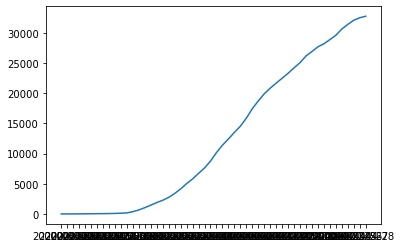

In [86]:
plt.plot(ny_suffolk_covid['date'],ny_suffolk_covid['confirmed'])

In [87]:
# mobility data after March 8, 2020
ny_suffolk_mob=mobilityf[(mobilityf['state']=='NEW YORK')&(mobilityf['county']=='Suffolk')&(mobilityf['date']>='2020-03-08')]

In [88]:
ny_suffolk_mob.head()

,state,county,date,retail,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
92441,NEW YORK,Suffolk,2020-03-08,4.0,5.0,72.0,3.0,3.0,0.0
92442,NEW YORK,Suffolk,2020-03-09,4.0,8.0,107.0,-2.0,3.0,0.0
92443,NEW YORK,Suffolk,2020-03-10,3.0,7.0,29.0,-5.0,3.0,1.0
92444,NEW YORK,Suffolk,2020-03-11,4.0,10.0,47.0,-7.0,2.0,0.0
92445,NEW YORK,Suffolk,2020-03-12,3.0,27.0,15.0,-13.0,0.0,1.0


Text(0.5, 1.0, 'Residential')

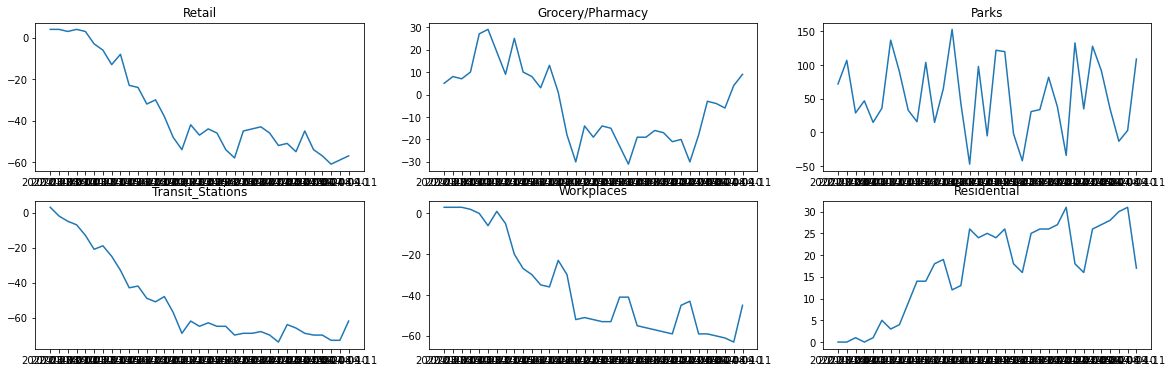

In [89]:
f,axs=plt.subplots(2,3,figsize=(20,6))
plt.subplot(2,3,1)
plt.plot(ny_suffolk_mob['date'],ny_suffolk_mob['retail'])
#plt.plot(ny_suffolk_covid['date'],ny_suffolk_covid['confirmed'])
plt.title("Retail")
plt.subplot(2,3,2)
plt.plot(ny_suffolk_mob['date'],ny_suffolk_mob['grocery_and_pharmacy'])
plt.title("Grocery/Pharmacy")
plt.subplot(2,3,3)
plt.plot(ny_suffolk_mob['date'],ny_suffolk_mob['parks'])
plt.title("Parks")
plt.subplot(2,3,4)
plt.plot(ny_suffolk_mob['date'],ny_suffolk_mob['transit_stations'])
plt.title("Transit_Stations")
plt.subplot(2,3,5)
plt.plot(ny_suffolk_mob['date'],ny_suffolk_mob['workplaces'])
plt.title("Workplaces")
plt.subplot(2,3,6)
plt.plot(ny_suffolk_mob['date'],ny_suffolk_mob['residential'])
plt.title("Residential")


Text(0, 0.5, 'Mobility')

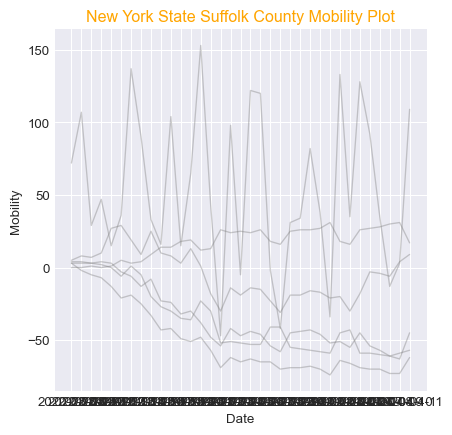

In [90]:
plt.style.use('seaborn-darkgrid')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)
 
# multiple line plot
for column in ny_suffolk_mob.drop(['state','county','date'], axis=1):
   plt.plot(ny_suffolk_mob['date'], ny_suffolk_mob[column], marker='', color='grey', linewidth=1, alpha=0.4)
 #plt.plot(ny_suffolk_mob['date'], ny_suffolk_mob['retail'], marker='', color='orange', linewidth=1, alpha=0.7)
#plt.legend(loc=2, ncol=2)
# Add titles
plt.title("New York State Suffolk County Mobility Plot", loc='center', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Date")
plt.ylabel("Mobility")
 

<h4> Any new york state county

In [162]:
# The first covid-19 case in New York Suffolk County is on March 8, 2020
ny_covid=covid[(covid['st_abbr']=='NY')&(covid['county']!='New')&(covid['confirmed']>0)]
ny_covid.head()

,county,st_abbr,date,confirmed,deaths
195952,Albany,NY,2020-03-12,1,0
195953,Albany,NY,2020-03-13,2,0
195954,Albany,NY,2020-03-14,5,0
195955,Albany,NY,2020-03-15,8,0
195956,Albany,NY,2020-03-16,12,0


In [97]:
nylist=ny_covid['county'].unique()
nylist

array(['Albany', 'Allegany', 'Bronx', 'Broome', 'Cattaraugus', 'Cayuga',
       'Chautauqua', 'Chemung', 'Chenango', 'Clinton', 'Columbia',
       'Cortland', 'Delaware', 'Dutchess', 'Erie', 'Essex', 'Franklin',
       'Fulton', 'Genesee', 'Greene', 'Hamilton', 'Herkimer', 'Jefferson',
       'Kings', 'Lewis', 'Livingston', 'Madison', 'Monroe', 'Montgomery',
       'Nassau', 'Niagara', 'Oneida', 'Onondaga', 'Ontario', 'Orange',
       'Orleans', 'Oswego', 'Otsego', 'Putnam', 'Queens', 'Rensselaer',
       'Richmond', 'Rockland', 'St.', 'Saratoga', 'Schenectady',
       'Schoharie', 'Schuyler', 'Seneca', 'Steuben', 'Suffolk',
       'Sullivan', 'Tioga', 'Tompkins', 'Ulster', 'Warren', 'Washington',
       'Wayne', 'Westchester', 'Wyoming', 'Yates'], dtype=object)

In [101]:
for row in nylist:
   datelist=ny_covid['date'][ny_covid['county']==row].min()

In [102]:
datelist

'2020-04-01'

<h4> Define a function for New York State

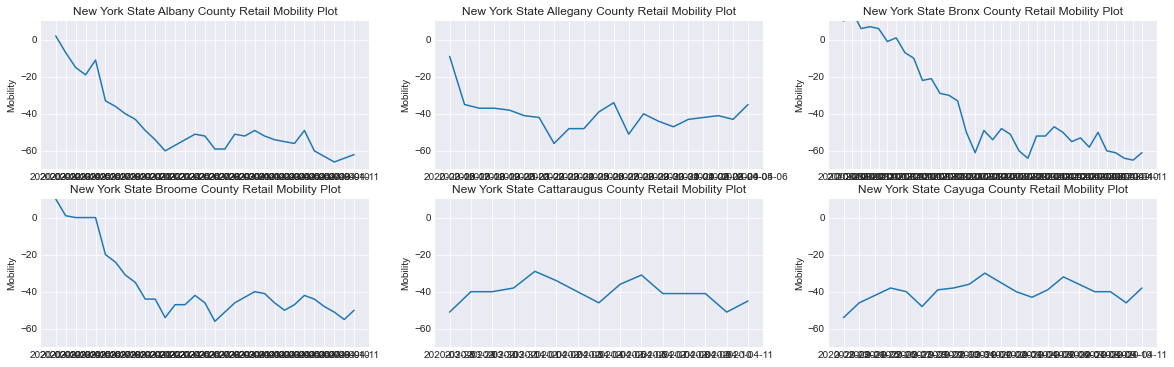

In [138]:
def plot(a):
    f,axs=plt.subplots(2,3,figsize=(20,6))
    for i in range(1+a,7+a):
        plt.subplot(2,3,i-a)
        ny_county_mob=mobilityf[(mobilityf['state']=='NEW YORK')&(mobilityf['county']==nylist[i-1])&(mobilityf['date']>=ny_covid['date'][ny_covid['county']==nylist[i-1]].min())]
        plt.plot(ny_county_mob['date'],ny_county_mob['retail'])
        plt.title("New York State "+str(nylist[i-1])+" County Retail Mobility Plot") 
        #plt.xlabel("Date")
        plt.ylabel("Mobility")
        plt.ylim(-70,10)
plot(0)

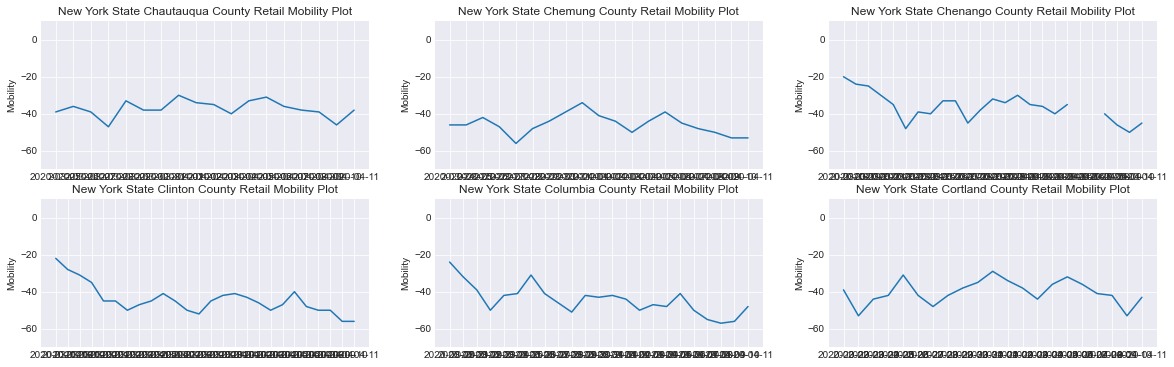

In [139]:
plot(6)

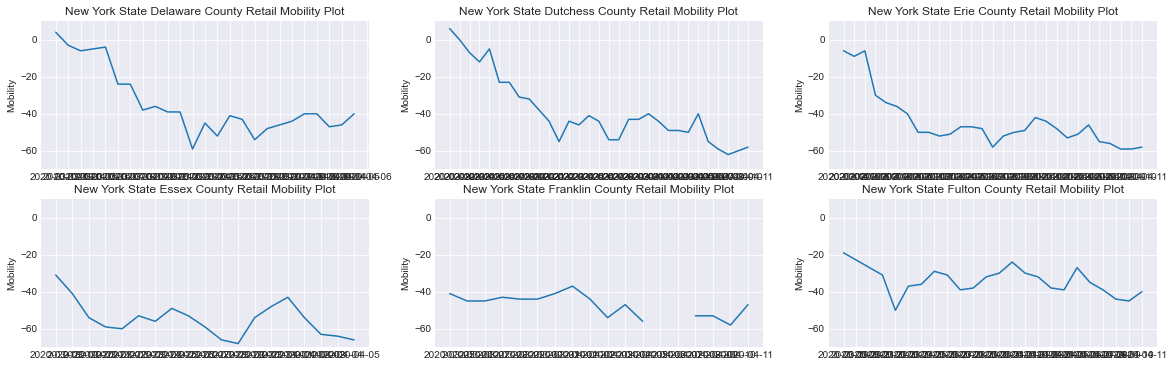

In [140]:
plot(12)

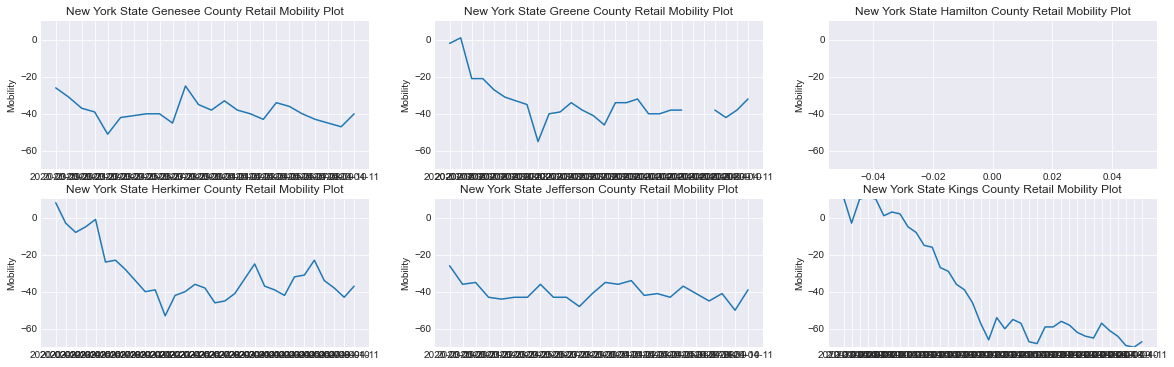

In [141]:
plot(18)

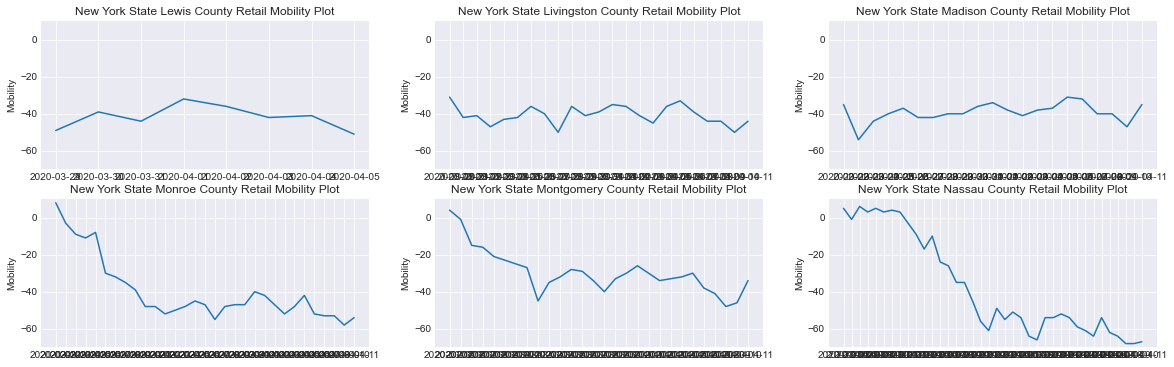

In [142]:
plot(24)

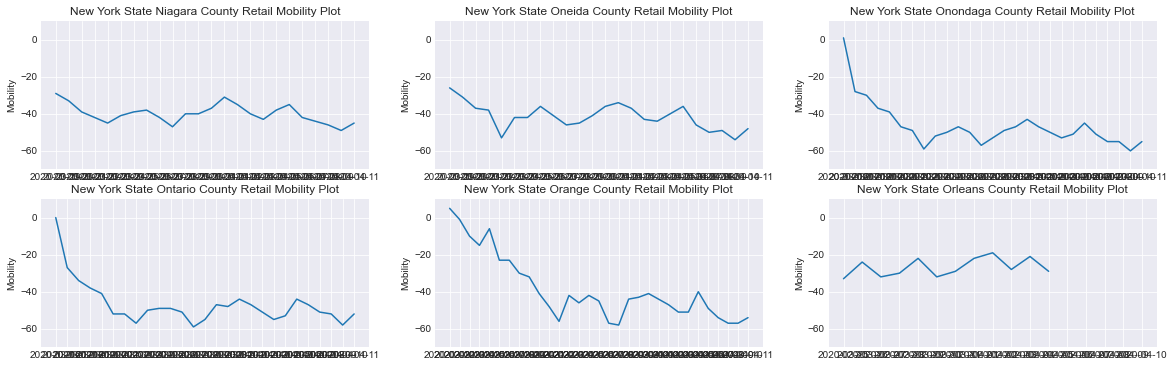

In [143]:
plot(30)

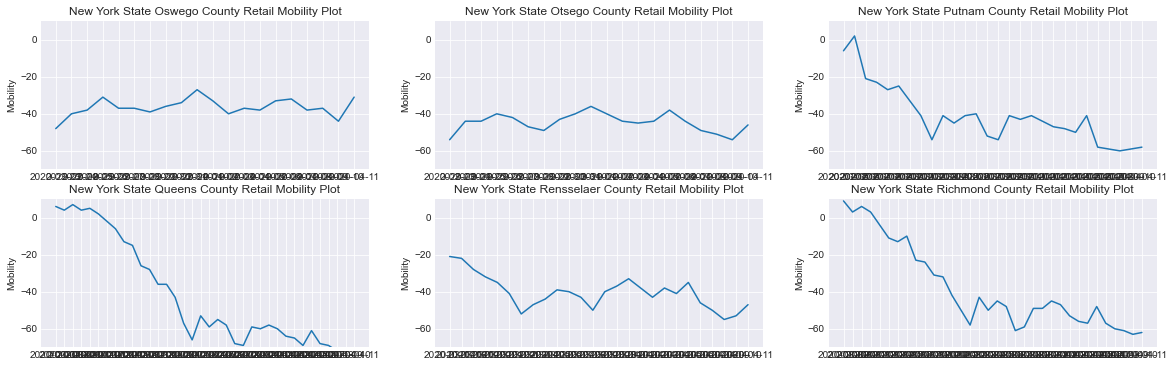

In [144]:
plot(36)

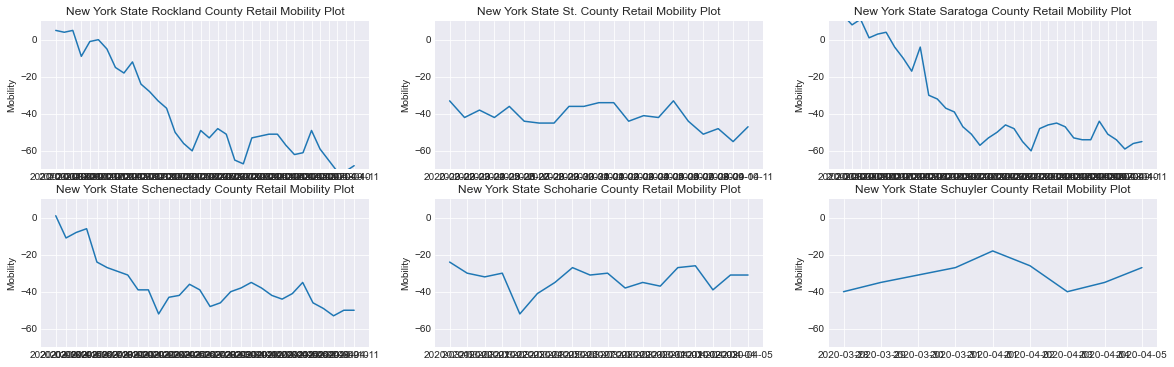

In [145]:
plot(42)

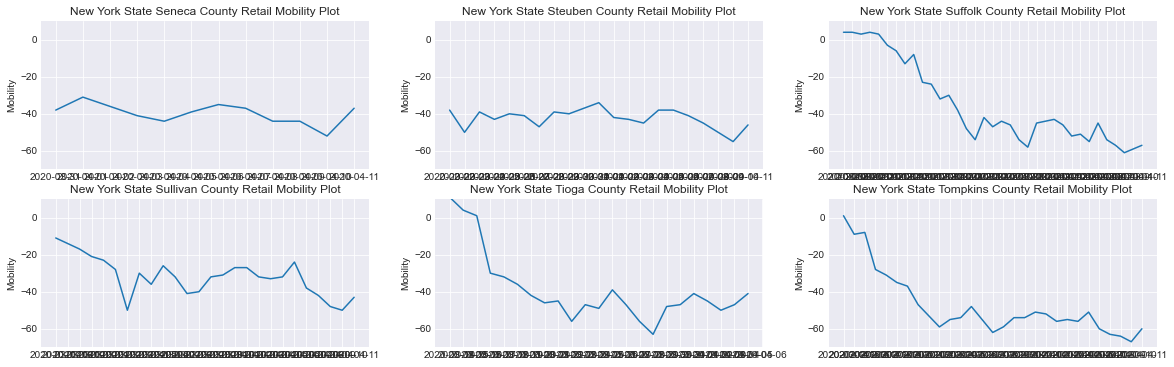

In [146]:
plot(48)

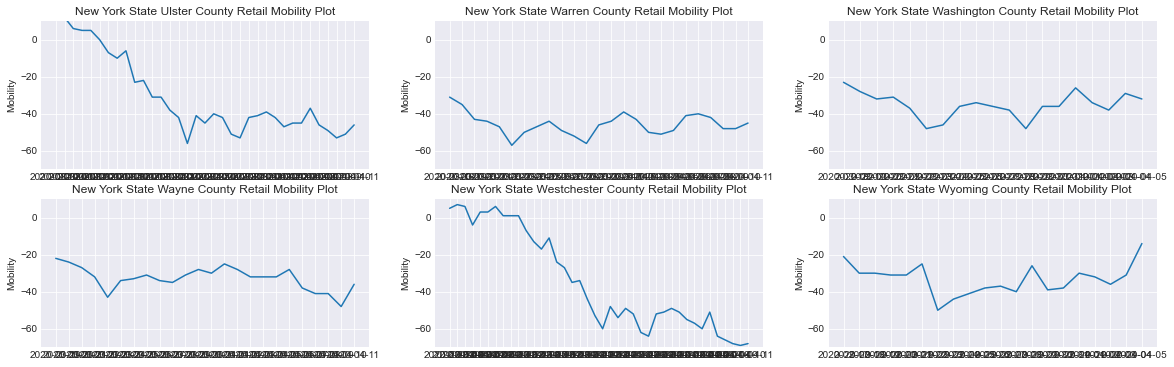

In [147]:
plot(54)

In [137]:
len(nylist)
#plot(60)

61

Define a function for any county in any state and any type of activity

In [307]:
from numpy import nan as NA
def plot_all(state, state_abb, column, a):
    state_covid=covid[(covid['st_abbr']==state_abb)&(covid['confirmed']>0)]
    #statelist=state_covid['county'].unique()
    statelist=mobilityf[mobilityf['state']==str.upper(state)]['county'].unique()
    f,axs=plt.subplots(2,3,figsize=(20,6))
    for i in range(1+a,7+a):
        state_county_mob=mobilityf[(mobilityf['state']==str.upper(state))&(mobilityf['county']==statelist[i-1])&(mobilityf['date']>=state_covid['date'][state_covid['county']==statelist[i-1]].min())]
        plt.subplot(2,3,i-a)
        plt.title(""+str(state)+" "+str(statelist[i-1])+" County "+str(column)+" Mobility Plot") 
        plt.xlabel("Date")
        plt.ylabel("Mobility")
        #plt.ylim(-70,30)
        plt.ylim(min(mobilityf[mobilityf['state']==str.upper(state)][str.lower(column)])-5,max(mobilityf[mobilityf['state']==str.upper(state)][str.lower(column)]))
        plt.tick_params(axis='x',which='both',bottom=True,top=False,labelbottom=False,grid_alpha=1)
        #if not state_county_mob[str.lower(column)].empty:
            #if not state_county_mob[str.lower(column)].dropna().empty:
                #plt.subplot(2,3,i-a)
                #plt.tick_params(axis='x',which='both',bottom=True,top=False,labelbottom=False,grid_alpha=1)
        plt.plot(state_county_mob['date'],state_county_mob[str.lower(column)])
                #plt.xaxis.set_major_locator(plt.MaxNLocator(5))
                #plt.title(""+str(state)+" "+str(nylist[i-1])+" County "+str(column)+" Mobility Plot") 
                #plt.xlabel("Date")
                #plt.ylabel("Mobility")
                #plt.ylim(-70,30)
                #plt.xlim('2020-04-01','2020-04-11')        
        

In [182]:
state_covid=covid[(covid['st_abbr']=='TX')&(covid['confirmed']>0)]
state_county_mob=mobilityf[(mobilityf['state']==str.upper('Texas'))&(mobilityf['county']=='Cattaraugus')&
          (mobilityf['date']>=state_covid['date'][state_covid['county']=='Cattaraugus'].min())]
if not state_county_mob[str.lower('retail')].empty:
    print("empty")

In [299]:
mobilityf[mobilityf['state']==str.upper('Texas')]['county'].unique()

array(['Anderson', 'Andrews', 'Angelina', 'Aransas', 'Archer', 'Atascosa',
       'Austin', 'Bailey', 'Bandera', 'Bastrop', 'Bee', 'Bell', 'Bexar',
       'Blanco', 'Bosque', 'Bowie', 'Brazoria', 'Brazos', 'Brewster',
       'Brooks', 'Brown', 'Burleson', 'Burnet', 'Caldwell', 'Calhoun',
       'Callahan', 'Cameron', 'Camp', 'Carson', 'Cass', 'Castro',
       'Chambers', 'Cherokee', 'Childress', 'Clay', 'Coke', 'Coleman',
       'Collin', 'Colorado', 'Comal', 'Comanche', 'Cooke', 'Coryell',
       'Crane', 'Crockett', 'Crosby', 'Culberson', 'Dallam', 'Dallas',
       'Dawson', 'Deaf', 'Delta', 'Denton', 'DeWitt', 'Dimmit', 'Donley',
       'Duval', 'Eastland', 'Ector', 'El', 'Ellis', 'Erath', 'Falls',
       'Fannin', 'Fayette', 'Floyd', 'Fort', 'Franklin', 'Freestone',
       'Frio', 'Gaines', 'Galveston', 'Garza', 'Gillespie', 'Goliad',
       'Gonzales', 'Gray', 'Grayson', 'Gregg', 'Grimes', 'Guadalupe',
       'Hale', 'Hall', 'Hamilton', 'Hardeman', 'Hardin', 'Harris',
       'Harr

In [300]:
#covid.info()
covid[covid['st_abbr']==str.upper('TX')]['county'].unique()

array(['Anderson', 'Andrews', 'Angelina', 'Aransas', 'Archer',
       'Armstrong', 'Atascosa', 'Austin', 'Bailey', 'Bandera', 'Bastrop',
       'Baylor', 'Bee', 'Bell', 'Bexar', 'Blanco', 'Borden', 'Bosque',
       'Bowie', 'Brazoria', 'Brazos', 'Brewster', 'Briscoe', 'Brooks',
       'Brown', 'Burleson', 'Burnet', 'Caldwell', 'Calhoun', 'Callahan',
       'Cameron', 'Camp', 'Carson', 'Cass', 'Castro', 'Chambers',
       'Cherokee', 'Childress', 'Clay', 'Cochran', 'Coke', 'Coleman',
       'Collin', 'Collingsworth', 'Colorado', 'Comal', 'Comanche',
       'Concho', 'Cooke', 'Coryell', 'Cottle', 'Crane', 'Crockett',
       'Crosby', 'Culberson', 'Dallam', 'Dallas', 'Dawson', 'Deaf',
       'Delta', 'Denton', 'DeWitt', 'Dickens', 'Dimmit', 'Donley',
       'Duval', 'Eastland', 'Ector', 'Edwards', 'Ellis', 'El', 'Erath',
       'Falls', 'Fannin', 'Fayette', 'Fisher', 'Floyd', 'Foard', 'Fort',
       'Franklin', 'Freestone', 'Frio', 'Gaines', 'Galveston', 'Garza',
       'Gillespie', 'Glas

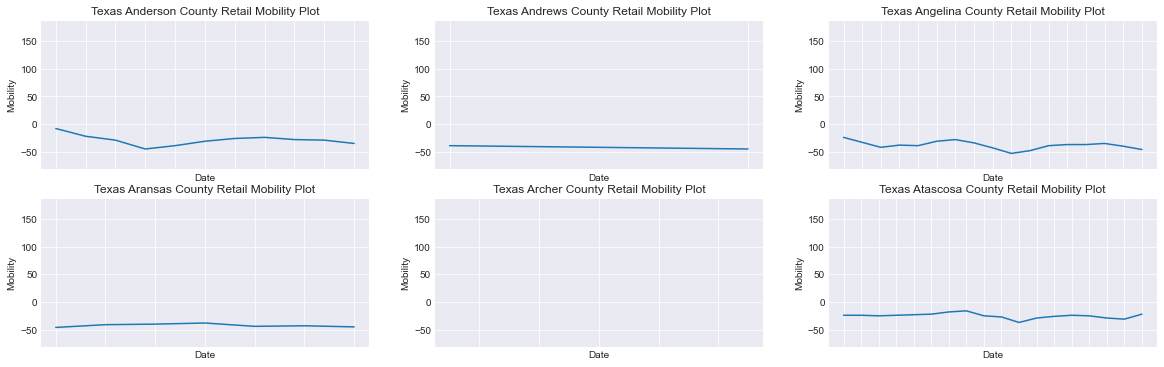

In [308]:
plot_all('Texas','TX','Retail',0)

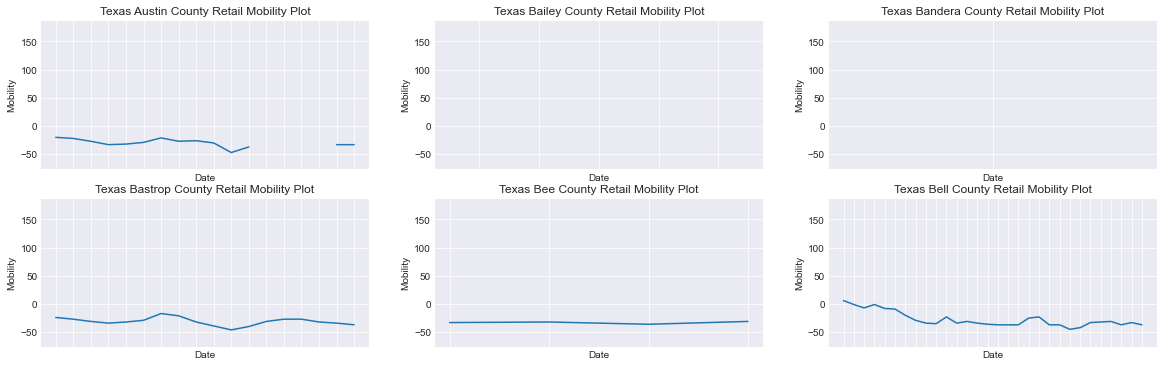

In [305]:
plot_all('Texas','TX','Retail',6)

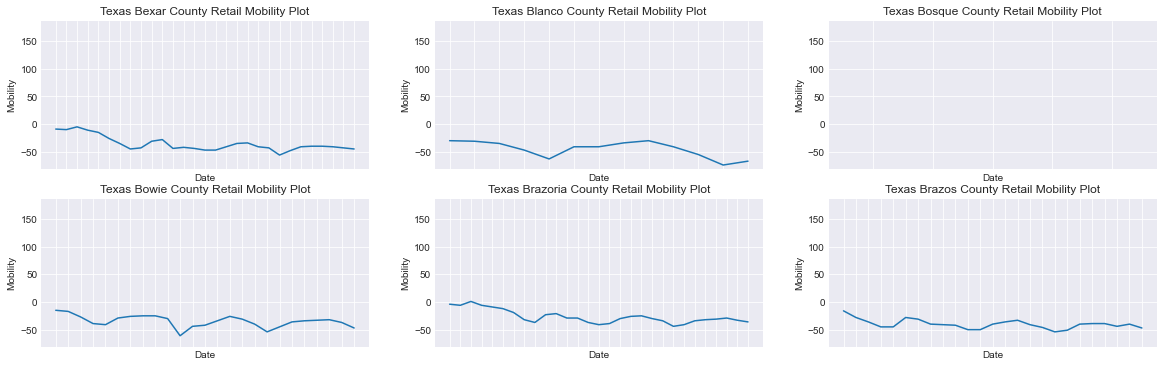

In [310]:
plot_all('Texas','TX','Retail',12)

In [346]:
socialf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   state      3142 non-null   object 
 1   st_abbr    3142 non-null   object 
 2   county     3142 non-null   object 
 3   ep_pov     3142 non-null   float64
 4   ep_unemp   3142 non-null   float64
 5   ep_age65   3142 non-null   float64
 6   ep_minrty  3142 non-null   float64
dtypes: float64(4), object(3)
memory usage: 172.0+ KB


In [347]:
healthf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3142 entries, 1 to 3192
Data columns (total 17 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   state                                            3142 non-null   object 
 1   county                                           3142 non-null   object 
 2   num_deaths                                       2849 non-null   float64
 3   years_of_potential_life_lost_rate                2849 non-null   float64
 4   percent_fair_or_poor_health                      3142 non-null   float64
 5   percent_low_birthweight                          3035 non-null   float64
 6   percent_smokers                                  3142 non-null   float64
 7   percent_driving_deaths_with_alcohol_involvement  3107 non-null   float64
 8   percent_adults_with_obesity                      3142 non-null   float64
 9   percent_physically_inactive   

In [348]:
covidsocial=covid0428.merge(socialf,on=['st_abbr','county'],how='inner')

In [349]:
covidsocial.shape

(2929, 10)

In [350]:
covidsocial.head()

,county,st_abbr,date,confirmed,deaths,state,ep_pov,ep_unemp,ep_age65,ep_minrty
0,Autauga,AL,2020-04-28,40,4,ALABAMA,12.3,5.6,14.0,24.3
1,Baldwin,AL,2020-04-28,171,3,ALABAMA,13.0,6.3,18.7,16.8
2,Barbour,AL,2020-04-28,37,0,ALABAMA,26.4,12.8,16.5,54.1
3,Bibb,AL,2020-04-28,42,0,ALABAMA,16.5,7.1,14.9,25.2
4,Blount,AL,2020-04-28,34,0,ALABAMA,16.5,6.0,17.2,12.3


In [351]:
covidsocialmobility=pd.merge(mobility0411,covidsocial,on=['state','county'],how='inner')

In [352]:
covidsocialmobility.head()

,state,county,date_x,retail,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,st_abbr,date_y,confirmed,deaths,ep_pov,ep_unemp,ep_age65,ep_minrty
0,ALABAMA,Autauga,2020-04-11,-37.0,16.0,NaN,NaN,-30.0,NaN,AL,2020-04-28,40,4,12.3,5.6,14.0,24.3
1,ALABAMA,Baldwin,2020-04-11,-44.0,-10.0,-42.0,-39.0,-28.0,11.0,AL,2020-04-28,171,3,13.0,6.3,18.7,16.8
2,ALABAMA,Barbour,2020-04-11,NaN,NaN,NaN,NaN,-31.0,NaN,AL,2020-04-28,37,0,26.4,12.8,16.5,54.1
3,ALABAMA,Bibb,2020-04-11,NaN,NaN,NaN,NaN,-19.0,NaN,AL,2020-04-28,42,0,16.5,7.1,14.9,25.2
4,ALABAMA,Blount,2020-04-11,-20.0,18.0,NaN,NaN,-24.0,NaN,AL,2020-04-28,34,0,16.5,6.0,17.2,12.3


In [353]:
covidsocialmobility.shape

(2128, 17)

In [354]:
csmh=pd.merge(covidsocialmobility,healthf,on=['state','county'],how='inner')

In [355]:
csmh.head()

,state,county,date_x,retail,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,st_abbr,...,percent_driving_deaths_with_alcohol_involvement,percent_adults_with_obesity,percent_physically_inactive,percent_excessive_drinking,percent_uninsured,primary_care_physicians_rate,percent_severe_housing_problems,life_expectancy,percent_homeowners,percent_rural
0,ALABAMA,Autauga,2020-04-11,-37.0,16.0,NaN,NaN,-30.0,NaN,AL,...,26.785714,33.3,34.7,15.026031,8.721686,45.04180,14.663462,76.879477,74.894625,42.002162
1,ALABAMA,Baldwin,2020-04-11,-44.0,-10.0,-42.0,-39.0,-28.0,11.0,AL,...,30.769231,31.0,26.5,17.958310,11.333404,72.89727,13.566201,78.450258,73.619343,42.279099
2,ALABAMA,Barbour,2020-04-11,NaN,NaN,NaN,NaN,-31.0,NaN,AL,...,40.000000,41.7,23.5,12.844016,12.242792,31.65809,14.583333,75.341935,61.397779,67.789635
3,ALABAMA,Bibb,2020-04-11,NaN,NaN,NaN,NaN,-19.0,NaN,AL,...,27.586207,37.6,33.5,15.570042,10.206253,48.52656,10.496454,73.571820,75.073099,68.352607
4,ALABAMA,Blount,2020-04-11,-20.0,18.0,NaN,NaN,-24.0,NaN,AL,...,19.444444,33.8,30.3,14.230594,13.360759,22.40877,10.548012,74.145826,78.626214,89.951502


In [356]:
csmh.st_abbr.value_counts()

TX    159
GA    112
VA     90
NC     89
OH     85
IN     82
TN     79
IL     79
MI     68
MO     67
KY     67
WI     66
PA     64
MN     59
NY     59
IA     58
FL     58
AL     55
MS     54
OK     52
AR     47
SC     44
LA     43
CA     40
KS     37
CO     36
WV     35
WA     30
OR     29
MD     26
ID     25
NE     25
NM     23
UT     20
NJ     20
ME     16
SD     15
MT     15
WY     14
MA     14
VT     12
AZ     12
ND     11
NH     10
NV      9
CT      6
RI      5
HI      4
DE      2
AK      1
Name: st_abbr, dtype: int64

In [357]:
len(csmh.state.value_counts())

50

In [358]:
sum(csmh.state.value_counts())

2128

In [359]:
csmh.shape

(2128, 32)

In [360]:
csmh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2128 entries, 0 to 2127
Data columns (total 32 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   state                                            2128 non-null   object 
 1   county                                           2128 non-null   object 
 2   date_x                                           2128 non-null   object 
 3   retail                                           1356 non-null   float64
 4   grocery_and_pharmacy                             1100 non-null   float64
 5   parks                                            694 non-null    float64
 6   transit_stations                                 931 non-null    float64
 7   workplaces                                       2058 non-null   float64
 8   residential                                      648 non-null    float64
 9   st_abbr                       

In [363]:
csmh.describe()

,retail,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,confirmed,deaths,ep_pov,ep_unemp,...,percent_driving_deaths_with_alcohol_involvement,percent_adults_with_obesity,percent_physically_inactive,percent_excessive_drinking,percent_uninsured,primary_care_physicians_rate,percent_severe_housing_problems,life_expectancy,percent_homeowners,percent_rural
count,1356.00000,1100.000000,694.000000,931.000000,2058.000000,648.000000,2128.000000,2128.000000,2128.000000,2128.000000,...,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2101.000000,2128.000000,2127.000000,2128.000000,2128.000000
mean,-40.50000,-3.430909,3.217579,-36.981740,-31.233236,13.168210,437.382049,24.040883,16.100282,7.258929,...,27.617928,32.922556,27.102256,17.705034,10.859543,57.379517,14.273198,77.559079,70.773619,49.108508
std,11.24248,13.488773,50.984905,17.249675,8.680300,2.742607,2476.838189,196.823660,5.839163,2.641851,...,10.750490,5.280992,5.747981,3.151121,4.895736,31.785344,3.744091,2.730444,7.690162,27.351537
min,-96.00000,-71.000000,-90.000000,-89.000000,-72.000000,6.000000,0.000000,0.000000,3.700000,0.300000,...,0.000000,12.400000,9.500000,7.809632,2.262724,0.000000,4.043011,69.168418,19.607266,0.000000
25%,-47.00000,-10.000000,-36.000000,-47.000000,-36.000000,11.000000,10.000000,0.000000,12.000000,5.400000,...,20.833333,29.600000,23.400000,15.487919,6.922730,35.784760,11.747830,75.719867,66.596993,27.258367
50%,-40.00000,-3.000000,-6.500000,-36.000000,-31.000000,13.000000,33.000000,1.000000,15.600000,6.900000,...,27.272727,33.300000,27.000000,17.777825,9.965947,51.824660,13.727708,77.525249,71.742568,49.896325
75%,-33.00000,4.000000,34.000000,-27.000000,-26.000000,15.000000,127.250000,5.000000,19.325000,8.700000,...,33.333333,36.500000,30.900000,19.726430,13.616541,74.191080,16.100371,79.274776,76.209988,69.638610
max,-2.00000,64.000000,176.000000,26.000000,13.000000,23.000000,49929.000000,5281.000000,40.400000,21.800000,...,75.000000,51.000000,49.900000,28.623739,33.749600,514.448340,38.922851,96.753067,89.759499,100.000000


In [383]:
csmh1=csmh[(csmh['deaths']>=5)&(csmh1['deaths']<=csmh1['confirmed'])]

In [384]:
csmh1.describe()

,retail,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,confirmed,deaths,ep_pov,ep_unemp,...,percent_driving_deaths_with_alcohol_involvement,percent_adults_with_obesity,percent_physically_inactive,percent_excessive_drinking,percent_uninsured,primary_care_physicians_rate,percent_severe_housing_problems,life_expectancy,percent_homeowners,percent_rural
count,496.000000,471.000000,363.000000,404.000000,531.000000,394.000000,535.000000,535.000000,535.000000,535.000000,...,535.000000,535.000000,535.000000,535.000000,535.000000,533.000000,535.000000,535.000000,535.000000,535.000000
mean,-44.933468,-5.923567,15.991736,-40.586634,-36.709981,14.022843,1607.970093,91.592523,15.160561,7.415888,...,27.476877,31.250280,24.907850,18.279389,9.915006,71.835433,16.131413,78.428792,67.630314,25.654991
std,10.181465,12.572788,53.635535,16.967928,7.060832,2.674350,4747.501967,384.338785,6.234145,2.322474,...,8.558837,5.573025,5.631793,2.846695,4.712944,32.739849,4.371271,2.699030,8.921065,22.879388
min,-80.000000,-54.000000,-81.000000,-85.000000,-72.000000,7.000000,29.000000,5.000000,3.800000,2.900000,...,0.000000,12.900000,9.500000,7.809632,2.262724,7.279610,7.142857,70.465851,19.607266,0.000000
25%,-51.000000,-14.000000,-28.000000,-53.000000,-40.000000,12.000000,155.500000,8.000000,10.800000,5.900000,...,22.263527,27.700000,21.000000,16.341029,6.136445,47.176890,13.305829,76.530264,62.415195,6.533802
50%,-44.000000,-6.000000,9.000000,-40.000000,-37.000000,14.000000,327.000000,15.000000,14.700000,7.100000,...,28.030303,31.600000,24.900000,18.396442,8.721584,68.012010,15.489939,78.451237,68.687023,19.867883
75%,-39.000000,1.000000,51.000000,-31.000000,-32.000000,15.000000,866.500000,40.000000,18.100000,8.500000,...,32.391515,35.500000,28.600000,20.060551,12.937102,90.880930,18.069842,80.268294,73.461360,38.280883
max,-12.000000,51.000000,176.000000,26.000000,-15.000000,23.000000,49929.000000,5281.000000,40.400000,18.500000,...,64.285714,51.000000,42.500000,28.224812,31.207924,227.199380,38.922851,90.122325,89.759499,100.000000


In [385]:
csmh1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535 entries, 7 to 2109
Data columns (total 32 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   state                                            535 non-null    object 
 1   county                                           535 non-null    object 
 2   date_x                                           535 non-null    object 
 3   retail                                           496 non-null    float64
 4   grocery_and_pharmacy                             471 non-null    float64
 5   parks                                            363 non-null    float64
 6   transit_stations                                 404 non-null    float64
 7   workplaces                                       531 non-null    float64
 8   residential                                      394 non-null    float64
 9   st_abbr                        

In [395]:
csmh1['casedeathrate']=csmh1['deaths']/csmh1['confirmed']*100
csmh1['casedeathrate'].describe()

<ipython-input-395-8cf4d1bd8337>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csmh1['casedeathrate']=csmh1['deaths']/csmh1['confirmed']*100


count    535.000000
mean       5.914725
std        3.678325
min        0.097800
25%        3.360320
50%        5.080409
75%        7.894737
max       22.916667
Name: casedeathrate, dtype: float64

Text(0.5, 1.0, 'Covid-19 Case Death Rate on 2020-04-28 in US Counties')

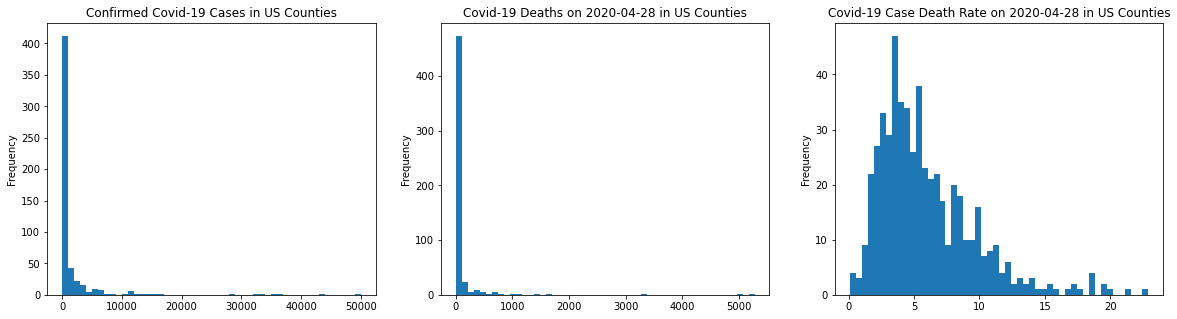

In [396]:
f,axs=plt.subplots(1,3,figsize=(20,5))
plt.subplot(1,3,1)
csmh1['confirmed'].plot.hist(bins=50)
plt.title("Confirmed Covid-19 Cases in US Counties")
# Histogram on only none-zero values of the inpatient reimbursement. Still very skewed due to the presence of 
# extreme large values. 
plt.subplot(1,3,2)
csmh1['deaths'].plot.hist(bins=50)
plt.title("Covid-19 Deaths on 2020-04-28 in US Counties")
plt.subplot(1,3,3)
csmh1['casedeathrate'].plot.hist(bins=50)
plt.title("Covid-19 Case Death Rate on 2020-04-28 in US Counties")

In [456]:
csmh1['mobility']=csmh1[['retail','grocery_and_pharmacy','parks','transit_stations','workplaces','residential']].mean(1)

<ipython-input-456-4a191ee717db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csmh1['mobility']=csmh1[['retail','grocery_and_pharmacy','parks','transit_stations','workplaces','residential']].mean(1)


In [457]:
csmh1['mobility'].describe()

count    535.000000
mean     -20.037103
std       12.162012
min      -60.500000
25%      -27.416667
50%      -20.200000
75%      -12.833333
max       13.800000
Name: mobility, dtype: float64

In [419]:
csmh1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535 entries, 7 to 2109
Data columns (total 34 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   state                                            535 non-null    object 
 1   county                                           535 non-null    object 
 2   date_x                                           535 non-null    object 
 3   retail                                           496 non-null    float64
 4   grocery_and_pharmacy                             471 non-null    float64
 5   parks                                            363 non-null    float64
 6   transit_stations                                 404 non-null    float64
 7   workplaces                                       531 non-null    float64
 8   residential                                      394 non-null    float64
 9   st_abbr                        

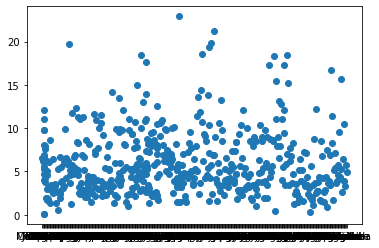

In [401]:
plt.scatter(csmh1['county'],csmh1['casedeathrate'])

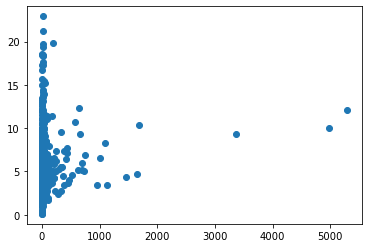

In [403]:
plt.scatter(csmh1['deaths'],csmh1['casedeathrate'])

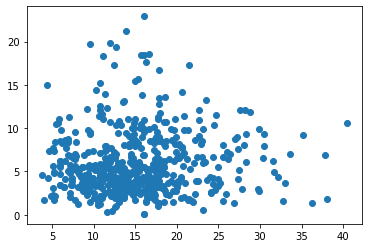

In [404]:
plt.scatter(csmh1['ep_pov'],csmh1['casedeathrate'])

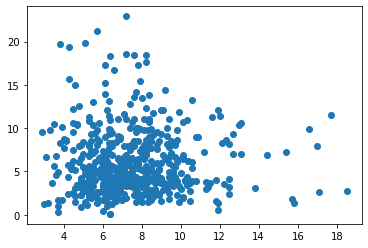

In [405]:
plt.scatter(csmh1['ep_unemp'],csmh1['casedeathrate'])

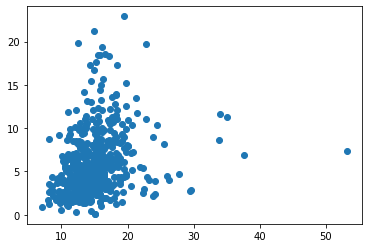

In [406]:
plt.scatter(csmh1['ep_age65'],csmh1['casedeathrate'])

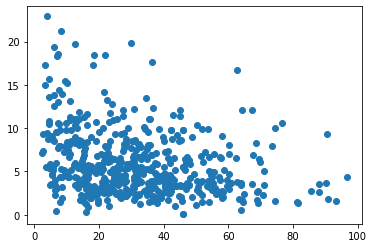

In [407]:
plt.scatter(csmh1['ep_minrty'],csmh1['casedeathrate'])

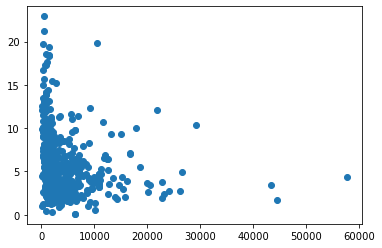

In [408]:
plt.scatter(csmh1['num_deaths'],csmh1['casedeathrate'])

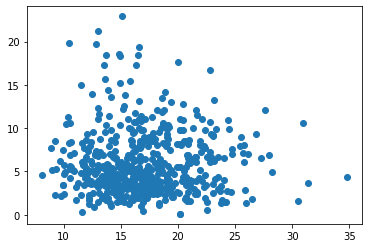

In [409]:
plt.scatter(csmh1['percent_fair_or_poor_health'],csmh1['casedeathrate'])

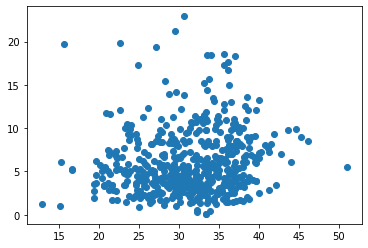

In [410]:
plt.scatter(csmh1['percent_adults_with_obesity'],csmh1['casedeathrate'])

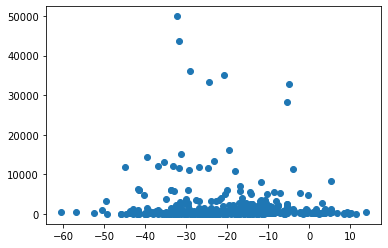

In [421]:
plt.scatter(csmh1['mobility'],csmh1['confirmed'])

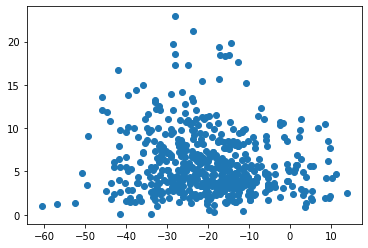

In [428]:
plt.scatter(csmh1['mobility'],csmh1['casedeathrate'])

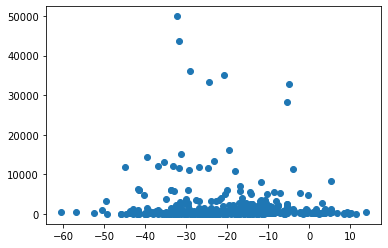

In [429]:
plt.scatter(csmh1['mobility'],csmh1['confirmed'])

In [443]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [453]:
model=smf.ols('casedeathrate ~ mobility',data=ny)

In [454]:
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          casedeathrate   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     10.90
Date:                Mon, 03 Aug 2020   Prob (F-statistic):            0.00272
Time:                        11:12:46   Log-Likelihood:                -66.176
No. Observations:                  29   AIC:                             136.4
Df Residuals:                      27   BIC:                             139.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5645      0.714      4.992      0.0

In [430]:
ny=csmh1[csmh1['st_abbr']=='NY']

In [432]:
ny.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 1170 to 1227
Data columns (total 34 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   state                                            29 non-null     object 
 1   county                                           29 non-null     object 
 2   date_x                                           29 non-null     object 
 3   retail                                           27 non-null     float64
 4   grocery_and_pharmacy                             25 non-null     float64
 5   parks                                            21 non-null     float64
 6   transit_stations                                 25 non-null     float64
 7   workplaces                                       29 non-null     float64
 8   residential                                      22 non-null     float64
 9   st_abbr                      

In [431]:
ny.describe()

,retail,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,confirmed,deaths,ep_pov,ep_unemp,...,percent_physically_inactive,percent_excessive_drinking,percent_uninsured,primary_care_physicians_rate,percent_severe_housing_problems,life_expectancy,percent_homeowners,percent_rural,casedeathrate,mobility
count,27.000000,25.000000,21.000000,25.000000,29.000000,22.000000,29.000000,29.000000,29.000000,29.000000,...,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,-54.740741,10.960000,54.095238,-48.600000,-40.448276,15.772727,9371.517241,665.344828,13.431034,7.113793,...,24.368966,19.692568,5.695733,73.132293,18.986592,80.187499,65.813888,25.346154,5.378079,-16.519540
std,9.125588,18.081943,57.693938,11.150486,8.227073,2.942817,15352.616821,1424.303696,4.970492,1.536630,...,3.412907,1.699456,1.387952,29.605882,7.112457,1.791788,13.665726,24.332846,2.857771,13.958065
min,-71.000000,-22.000000,-24.000000,-73.000000,-62.000000,13.000000,63.000000,5.000000,5.200000,4.900000,...,20.000000,15.950196,3.772825,7.320110,9.188847,77.654238,19.607266,0.000000,1.707317,-50.666667
25%,-61.500000,0.000000,11.000000,-54.000000,-45.000000,13.000000,266.000000,15.000000,11.500000,6.100000,...,21.200000,18.485621,4.910644,56.365810,14.765764,78.742584,64.777606,3.273477,3.234501,-27.000000
50%,-55.000000,8.000000,40.000000,-49.000000,-39.000000,14.500000,932.000000,24.000000,12.900000,7.000000,...,23.700000,19.786022,5.337830,71.162090,15.939878,79.884256,68.677566,22.340691,4.690832,-16.500000
75%,-47.500000,25.000000,102.000000,-40.000000,-35.000000,18.500000,11453.000000,387.000000,15.100000,7.400000,...,26.500000,21.009588,6.041934,88.789420,22.888762,80.934118,71.778729,33.929414,6.571706,-5.333333
max,-35.000000,51.000000,151.000000,-29.000000,-27.000000,23.000000,49929.000000,5281.000000,30.500000,12.700000,...,32.800000,22.767440,10.191144,139.684590,38.922851,83.848646,82.411685,74.165345,12.115998,5.333333


Text(0.5, 1.0, 'Covid-19 Case Death Rate on 2020-04-28 in New York State Counties')

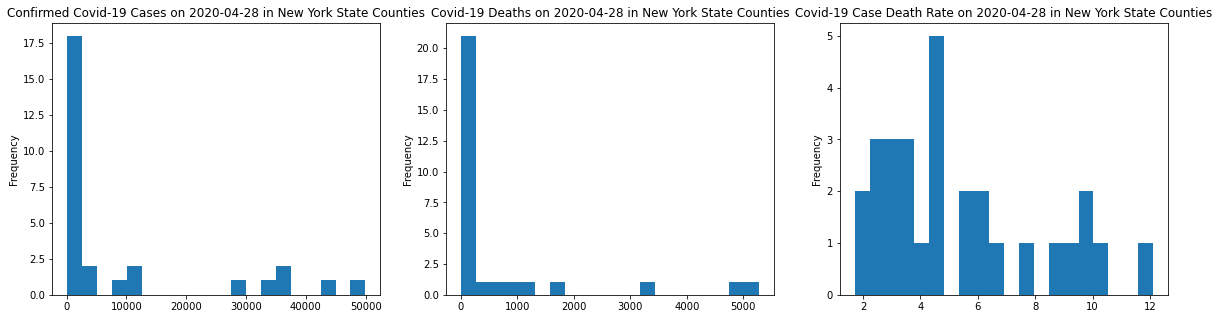

In [434]:
f,axs=plt.subplots(1,3,figsize=(20,5))
plt.subplot(1,3,1)
ny['confirmed'].plot.hist(bins=20)
plt.title("Confirmed Covid-19 Cases on 2020-04-28 in New York State Counties")
# Histogram on only none-zero values of the inpatient reimbursement. Still very skewed due to the presence of 
# extreme large values. 
plt.subplot(1,3,2)
ny['deaths'].plot.hist(bins=20)
plt.title("Covid-19 Deaths on 2020-04-28 in New York State Counties")
plt.subplot(1,3,3)
ny['casedeathrate'].plot.hist(bins=20)
plt.title("Covid-19 Case Death Rate on 2020-04-28 in New York State Counties")

In [435]:
ny['casedeathrate'].describe()

count    29.000000
mean      5.378079
std       2.857771
min       1.707317
25%       3.234501
50%       4.690832
75%       6.571706
max      12.115998
Name: casedeathrate, dtype: float64

Text(0.5, 1.0, 'Percent of Unemployment in New York State Counties')

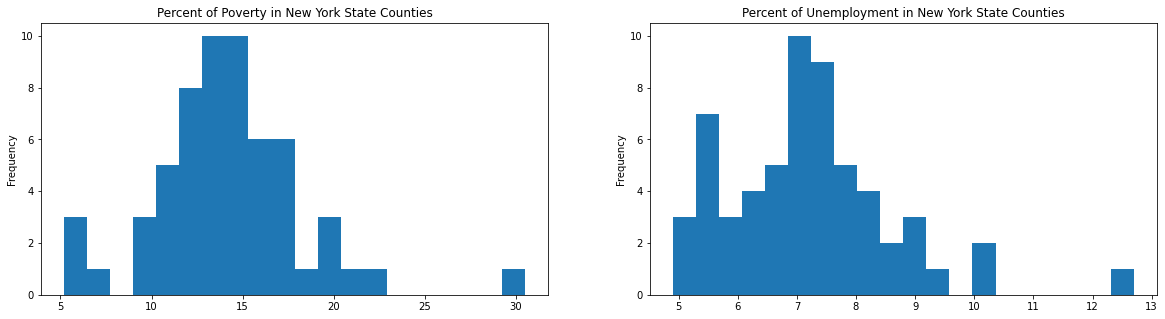

In [319]:
f,axs=plt.subplots(1,2,figsize=(20,5))
plt.subplot(1,2,1)
ny['ep_pov'].plot.hist(bins=20)
plt.title("Percent of Poverty in New York State Counties")
# Histogram on only none-zero values of the inpatient reimbursement. Still very skewed due to the presence of 
# extreme large values. 
plt.subplot(1,2,2)
ny['ep_unemp'].plot.hist(bins=20)
plt.title("Percent of Unemployment in New York State Counties")

Investigate the time course

In [455]:
csmh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2128 entries, 0 to 2127
Data columns (total 32 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   state                                            2128 non-null   object 
 1   county                                           2128 non-null   object 
 2   date_x                                           2128 non-null   object 
 3   retail                                           1356 non-null   float64
 4   grocery_and_pharmacy                             1100 non-null   float64
 5   parks                                            694 non-null    float64
 6   transit_stations                                 931 non-null    float64
 7   workplaces                                       2058 non-null   float64
 8   residential                                      648 non-null    float64
 9   st_abbr                       

In [458]:
csmh['mobility']=csmh[['retail','grocery_and_pharmacy','parks','transit_stations','workplaces','residential']].mean(1)

In [459]:
csmh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2128 entries, 0 to 2127
Data columns (total 33 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   state                                            2128 non-null   object 
 1   county                                           2128 non-null   object 
 2   date_x                                           2128 non-null   object 
 3   retail                                           1356 non-null   float64
 4   grocery_and_pharmacy                             1100 non-null   float64
 5   parks                                            694 non-null    float64
 6   transit_stations                                 931 non-null    float64
 7   workplaces                                       2058 non-null   float64
 8   residential                                      648 non-null    float64
 9   st_abbr                       

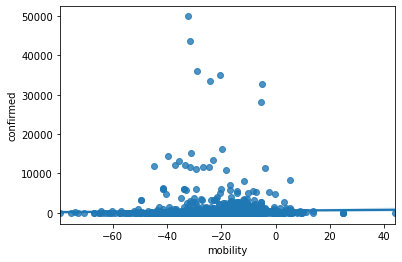

In [461]:
sns.regplot('mobility','confirmed',data=csmh)

In [464]:
csmhtime=csmh[['state','county','date_x','mobility','date_y','confirmed']]

In [465]:
csmhtime.head()

,state,county,date_x,mobility,date_y,confirmed
0,ALABAMA,Autauga,2020-04-11,-17.000000,2020-04-28,40
1,ALABAMA,Baldwin,2020-04-11,-25.333333,2020-04-28,171
2,ALABAMA,Barbour,2020-04-11,-31.000000,2020-04-28,37
3,ALABAMA,Bibb,2020-04-11,-19.000000,2020-04-28,42
4,ALABAMA,Blount,2020-04-11,-8.666667,2020-04-28,34


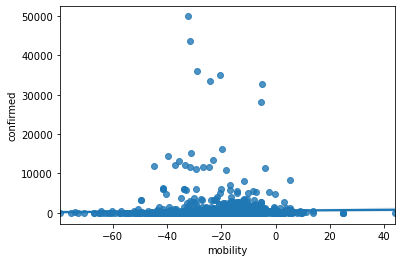

In [470]:
sns.regplot('mobility','confirmed',data=csmh[csmh['state']!='NY'])

In [477]:
csmh_nooutlier=csmh[(csmh['confirmed']<10000)&(csmh['mobility']<0)]

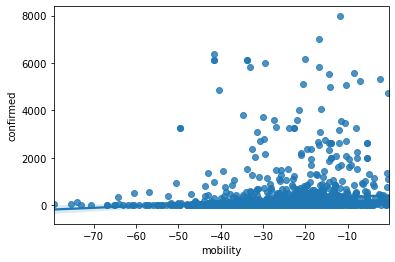

In [478]:
sns.regplot('mobility','confirmed',data=csmh_nooutlier)

In [491]:
csmh_nooutlier['mobility_squared']=csmh_nooutlier['mobility']**2
model=smf.ols('confirmed ~ mobility + mobility_squared',data=csmh_nooutlier)

<ipython-input-491-51009f21e39d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csmh_nooutlier['mobility_squared']=csmh_nooutlier['mobility']**2


In [492]:
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              confirmed   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     21.54
Date:                Wed, 05 Aug 2020   Prob (F-statistic):           5.51e-10
Time:                        10:47:25   Log-Likelihood:                -16339.
No. Observations:                2042   AIC:                         3.268e+04
Df Residuals:                    2039   BIC:                         3.270e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          651.9432     68.344  

In [74]:
# Calculate total amount of outpatient claims each provider submitted and create a panda dataframe with provider ID
# and total amount of outpatient claims
outreimburse_by_provider=outpatient_tr.groupby('Provider')['InscClaimAmtReimbursed'].sum()
outreimburse_temp1=pd.DataFrame([outreimburse_by_provider.index,outreimburse_by_provider])
outreimburse_temp2=outreimburse_temp1.transpose()
Out_Provider_Claim=outreimburse_temp2.rename({0:'Provider',1:'Outpatient_Claim_Amount'},axis=1)
Out_Provider_Claim

,Provider,Outpatient_Claim_Amount
0,PRV51001,7640
1,PRV51003,32670
2,PRV51004,52170
3,PRV51005,280910
4,PRV51007,14710
...,...,...
5007,PRV57759,10640
5008,PRV57760,4770
5009,PRV57761,18470
5010,PRV57762,1900


In [75]:
# merge the inpatient and outpatient claim amounts per provider dataframes
provider_claimamount=pd.merge(In_Provider_Claim,Out_Provider_Claim,on='Provider',how='outer')
provider_claimamount

,Provider,Inpatient_Claim_Amount,Outpatient_Claim_Amount
0,PRV51001,97000,7640
1,PRV51003,573000,32670
2,PRV51007,19000,14710
3,PRV51008,25000,10630
4,PRV51011,5000,11630
...,...,...,...
5405,PRV57759,NaN,10640
5406,PRV57760,NaN,4770
5407,PRV57761,NaN,18470
5408,PRV57762,NaN,1900


In [76]:
# Merge provider fraud data wth claim number and claim amount datasets
provider_list1=pd.merge(fraud_tr,provider_claimnumber,on='Provider',how='outer')
provider_list1
provider_list2=pd.merge(provider_list1,provider_claimamount,on='Provider',how='outer')
provider_list2

,Provider,PotentialFraud,Inpatient_Claim_Number,Outpatient_Claim_Number,Inpatient_Claim_Amount,Outpatient_Claim_Amount
0,PRV51001,No,5,20,97000,7640
1,PRV51003,Yes,62,70,573000,32670
2,PRV51004,No,NaN,149,NaN,52170
3,PRV51005,Yes,NaN,1165,NaN,280910
4,PRV51007,No,3,69,19000,14710
...,...,...,...,...,...,...
5405,PRV57759,No,NaN,28,NaN,10640
5406,PRV57760,No,NaN,22,NaN,4770
5407,PRV57761,No,NaN,82,NaN,18470
5408,PRV57762,No,NaN,1,NaN,1900


In [77]:
#Rename the dataset to provider_final
#provider_final=provider_list2.fillna(0)
provider_final=provider_list2

Findings: The potentially fraudulent providers had substantially more claims submitted and had been reimbursed substantially more. However, the per claim reimbursement is similar between the two groups of providers. 

Text(0.5, 1.0, 'Number of Outpatient Claims')

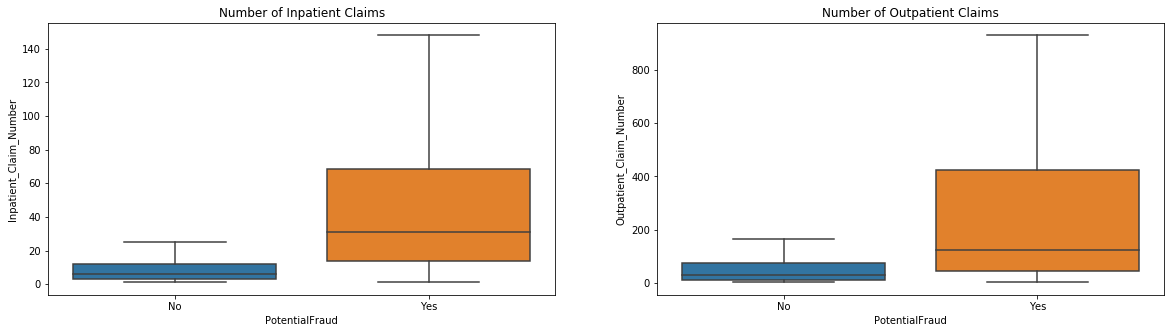

In [78]:
# plot boxplots to compare the number of inpatient and outpatients claims between the providers that are 
# fraudulent and those who are not. The potentially fraudulent providers had substantially more claims submitted than 
# the others
f,axs=plt.subplots(1,2,figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x="PotentialFraud",y="Inpatient_Claim_Number",data=provider_final,showfliers=False)
plt.title("Number of Inpatient Claims")
plt.subplot(1,2,2)
sns.boxplot(x="PotentialFraud",y="Outpatient_Claim_Number",data=provider_final,showfliers=False)
plt.title("Number of Outpatient Claims")

Text(0.5, 1.0, 'Amount of Outpatient Claims')

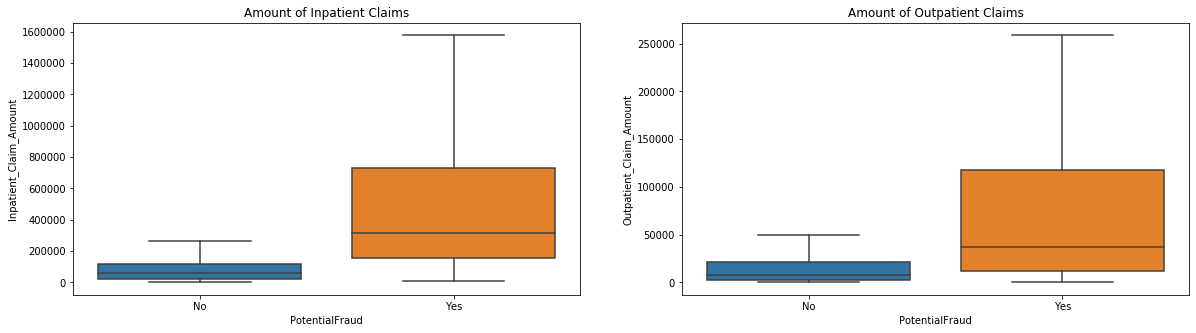

In [79]:
# plot boxplots to compare the total amounts of inpatient and outpatients claims between the providers that are 
# fraudulent and those who are not. The potentially fraudulent providers had substantially higher reimbursements than 
# the others
f,axs=plt.subplots(1,2,figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x="PotentialFraud",y="Inpatient_Claim_Amount",data=provider_final,showfliers=False)
plt.title("Amount of Inpatient Claims")
plt.subplot(1,2,2)
sns.boxplot(x="PotentialFraud",y="Outpatient_Claim_Amount",data=provider_final,showfliers=False)
plt.title("Amount of Outpatient Claims")

In [80]:
#Calculate the inpatient reimbursement per claim 
provider_list2['Inpatient_Perclaim_Amount']=provider_list2['Inpatient_Claim_Amount']/provider_list2['Inpatient_Claim_Number']

In [81]:
#Calculate the outpatient reimbursement per claim 
provider_list2['Outpatient_Perclaim_Amount']=provider_list2['Outpatient_Claim_Amount']/provider_list2['Outpatient_Claim_Number']

In [82]:
#inspect the final provider dataset
provider_list2

,Provider,PotentialFraud,Inpatient_Claim_Number,Outpatient_Claim_Number,Inpatient_Claim_Amount,Outpatient_Claim_Amount,Inpatient_Perclaim_Amount,Outpatient_Perclaim_Amount
0,PRV51001,No,5,20,97000,7640,19400,382
1,PRV51003,Yes,62,70,573000,32670,9241.94,466.714
2,PRV51004,No,NaN,149,NaN,52170,NaN,350.134
3,PRV51005,Yes,NaN,1165,NaN,280910,NaN,241.124
4,PRV51007,No,3,69,19000,14710,6333.33,213.188
...,...,...,...,...,...,...,...,...
5405,PRV57759,No,NaN,28,NaN,10640,NaN,380
5406,PRV57760,No,NaN,22,NaN,4770,NaN,216.818
5407,PRV57761,No,NaN,82,NaN,18470,NaN,225.244
5408,PRV57762,No,NaN,1,NaN,1900,NaN,1900


Text(0.5, 1.0, 'Outpatient Amount Per Claim')

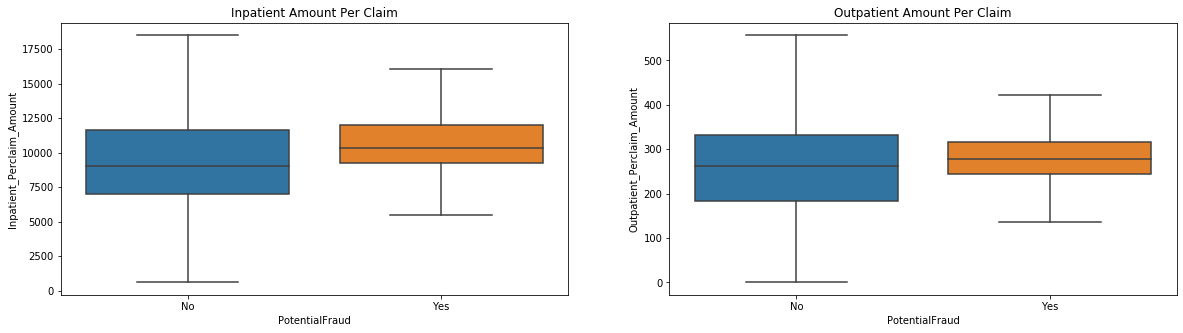

In [83]:
#Plot boxplots to compare the per claim reimbursements between the fraudulent providers and those who are not, 
#They look similar
f,axs=plt.subplots(1,2,figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x="PotentialFraud",y="Inpatient_Perclaim_Amount",data=provider_list2,showfliers=False)
plt.title("Inpatient Amount Per Claim")
plt.subplot(1,2,2)
sns.boxplot(x="PotentialFraud",y="Outpatient_Perclaim_Amount",data=provider_list2,showfliers=False)
plt.title("Outpatient Amount Per Claim")

<h3> Statistical Data Analysis

We are comparing the annual reimbursement of inpatient and outpatient visits between the following categories:
1.  Gender
2.  Chronic Conditions: 
2a. Alzheimer
2b. Heart Failure
2c. Kidney Disease
2d. Cancer
2e. Obstructive Pulmonary Disease
2f. Depression
2g. Diabetes
2h. Ischemic Heart Disease
2i. Osteoporasis
2j. Rheumatoidarthritis
2k. Stroke

In [84]:
import scipy.stats as sp

Question: Is there a difference of inpatient claims between men and women? 
              H0: There is no difference; H1: There is difference <br>
Answer: we used 2 sample t-test to test this hypothesis, p=0.51, so we don't reject the null hypothesis. <br>

In [85]:
# Calculate the mean inpatient reimbursement for men and women and test for the difference using 2 sample t-test.
print(np.mean(bene_tr.IPAnnualReimbursementAmt[bene_tr.Gender==1]))
print(np.mean(bene_tr.IPAnnualReimbursementAmt[bene_tr.Gender==2]))
sp.ttest_ind(bene_tr.IPAnnualReimbursementAmt[bene_tr.Gender==1],bene_tr.IPAnnualReimbursementAmt[bene_tr.Gender==2])

3640.688814129521
3675.2864510909412


Ttest_indResult(statistic=-0.6661422276840568, pvalue=0.505321304704989)

Question: Is there a difference of outpatient claims between men and women? 
              H0: There is no difference; H1: There is difference <br>
Answer: we used 2 sample t-test to test this hypothesis, p=0.009, so we will reject the null hypothesis and conclude there is significant difference of outpatient claim amount between men and women. However, the difference is between 1277.91 and 1313.49 dollars with a difference of 35.58 dollars. <br>

In [86]:
# Calculate the mean outpatient reimbursement for men and women and test for the difference using 2 sample t-test.
print(np.mean(bene_tr.OPAnnualReimbursementAmt[bene_tr.Gender==1]))
print(np.mean(bene_tr.OPAnnualReimbursementAmt[bene_tr.Gender==2]))
sp.ttest_ind(bene_tr.OPAnnualReimbursementAmt[bene_tr.Gender==1],bene_tr.OPAnnualReimbursementAmt[bene_tr.Gender==2])

1277.909503784693
1313.4884838065382


Ttest_indResult(statistic=-2.628402072235095, pvalue=0.008579651170132586)

Question: Is there a difference of inpatient claims between with Alzheimer and without? H0: There is no difference; H1: There is difference <br>
Answer: The mean inpatient claim for Alzheimer patient is 5371 dollars, and 2809 dollars for non-Alzheimer patients, the 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of inpatient claim amount for patient with Alzheimers. 

In [87]:
# Calculate the mean inpatient reimbursement for patients with Alzheimer's and those without
# and test for the difference using 2 sample t-test.
print(np.mean(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_Alzheimer==1]))
print(np.mean(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_Alzheimer==2]))
sp.ttest_ind(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_Alzheimer==1],bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_Alzheimer==2])

5371.234302350846
2809.4642818545335


Ttest_indResult(statistic=47.31543524464032, pvalue=0.0)

Question: Is there a difference of outpatient claims between with Alzheimer and without? H0: There is no difference; H1: There is difference <br>
Answer: The mean inpatient claim for Alzheimer patient is 1623 dollars, and 1136 dollars for non-Alzheimer patients, the 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of outpatient claim amount for patient with Alzheimers. 

In [88]:
# Calculate the mean outpatient reimbursement for patients with Alzheimer's and those without
# and test for the difference using 2 sample t-test.
print(np.mean(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_Alzheimer==1]))
print(np.mean(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_Alzheimer==2]))
sp.ttest_ind(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_Alzheimer==1],bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_Alzheimer==2])

1623.467387998088
1136.4403977088512


Ttest_indResult(statistic=34.38331255230874, pvalue=5.520428938725289e-258)

Question: Is there a difference of inpatient claims between with Heart failure and without? H0: There is no difference; H1: There is difference
Answer: The mean inpatient claim for heart failure patient is 5422 dollars, and 1943 dollars for non-heart failure patients, the 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of inpatient claim amount for patient with heart failures.

In [89]:
# Calculate the mean inpatient reimbursement for patients with Heart Failure and those without
# and test for the difference using 2 sample t-test.
print(np.mean(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_Heartfailure==1]))
print(np.mean(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_Heartfailure==2]))
sp.ttest_ind(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_Heartfailure==1],bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_Heartfailure==2])

5421.863980585363
1943.0085241041138


Ttest_indResult(statistic=68.8069277099246, pvalue=0.0)

Question: Is there a difference of outpatient claims between with Heart failure and without? H0: There is no difference; H1: There is difference
Answer: The mean outpatient claim for heart failure patient is 1671 dollars, and 935 dollars for non-heart failure patients, the 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of outpatient claim amount for patient with heart failures.

In [90]:
# Calculate the mean outpatient reimbursement for patients with Heart Failure and those without
# and test for the difference using 2 sample t-test.
print(np.mean(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_Heartfailure==1]))
print(np.mean(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_Heartfailure==2]))
sp.ttest_ind(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_Heartfailure==1],bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_Heartfailure==2])

1670.7223472997866
935.0256578384697


Ttest_indResult(statistic=55.506255911154845, pvalue=0.0)

Question: Is there a difference of inpatient claims between with kidney disease and without? H0: There is no difference; H1: There is difference
Answer: The mean inpatient claim for kidney disease patient is 7501 dollars, and 1916 dollars for non-kidney disease patients, the 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of inpatient claim amount for patient with kidney disease.

In [91]:
# Calculate the mean inpatient reimbursement for patients with Kidney Disease and those without
# and test for the difference using 2 sample t-test.
print(np.mean(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_KidneyDisease==1]))
print(np.mean(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_KidneyDisease==2]))
sp.ttest_ind(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_KidneyDisease==1],bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_KidneyDisease==2])

7500.779823933085
1915.9913725243239


Ttest_indResult(statistic=104.58724405263341, pvalue=0.0)

Question: Is there a difference of outpatient claims between with kidney disease and without? H0: There is no difference; H1: There is difference
Answer: The mean outpatient claim for kidney disease patient is 2062 dollars, and 951 dollars for non-kidney disease patients, the 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of outpatient claim amount for patient with kidney disease.

In [92]:
# Calculate the mean outpatient reimbursement for patients with Kidney Disease and those without
# and test for the difference using 2 sample t-test.
print(np.mean(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_KidneyDisease==1]))
print(np.mean(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_KidneyDisease==2]))
sp.ttest_ind(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_KidneyDisease==1],bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_KidneyDisease==2])

2061.6090944800017
951.4590089948256


Ttest_indResult(statistic=78.48124407662134, pvalue=0.0)

Question: Is there a difference of inpatient claims between with cancer and without? H0: There is no difference; H1: There is difference
Answer: The mean inpatient claim for cancer patient is 6068 dollars, and 3332 dollars for non-cancer patients, the 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of inpatient claim amount for patient with cancer.

In [93]:
# Calculate the mean inpatient reimbursement for patients with Cancer and those without
# and test for the difference using 2 sample t-test.
print(np.mean(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_Cancer==1]))
print(np.mean(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_Cancer==2]))
sp.ttest_ind(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_Cancer==1],bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_Cancer==2])

6068.013356597076
3332.2648132201584


Ttest_indResult(statistic=34.72883282548054, pvalue=3.949885798545562e-263)

Question: Is there a difference of outpatient claims between with cancer and without? H0: There is no difference; H1: There is difference
Answer: The mean outpatient claim for cancer patient is 1788 dollars, and 1231 dollars for non-cancer patients, the 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of outpatient claim amount for patient with cancer.

In [94]:
# Calculate the mean outpatient reimbursement for patients with Cancer and those without
# and test for the difference using 2 sample t-test.
print(np.mean(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_Cancer==1]))
print(np.mean(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_Cancer==2]))
sp.ttest_ind(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_Cancer==1],bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_Cancer==2])

1788.427892425245
1231.402632550129


Ttest_indResult(statistic=27.08451998596713, pvalue=3.953773456549292e-161)

Question: Is there a difference of inpatient claims between with obstructive pulmonary disease and without? H0: There is no difference; H1: There is difference
Answer: The mean inpatient claim for obstructive pulmonary disease patient is 7362 dollars, and 2510 dollars for non-obstructive pulmonary disease patients, the 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of inpatient claim amount for patient with obstructive pulmonary disease.

In [95]:
# Calculate the mean inpatient reimbursement for patients with Obstructive Pulmonary Disease and those without
# and test for the difference using 2 sample t-test.
print(np.mean(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_ObstrPulmonary==1]))
print(np.mean(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_ObstrPulmonary==2]))
sp.ttest_ind(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_ObstrPulmonary==1],bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_ObstrPulmonary==2])

7362.034145896101
2509.6935580007002


Ttest_indResult(statistic=82.22315367518055, pvalue=0.0)

Question: Is there a difference of outpatient claims between with obstructive pulmonary disease and without? H0: There is no difference; H1: There is difference
Answer: The mean outpatient claim for obstructive pulmonary disease patient is 1811 dollars, and 1139 dollars for non-obstructive pulmonary disease patients, the 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of outpatient claim amount for patient with obstructive pulmonary disease.

In [96]:
# Calculate the mean outpatient reimbursement for patients with Obstructive Pulmonary Disease and those without
# and test for the difference using 2 sample t-test.
print(np.mean(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_ObstrPulmonary==1]))
print(np.mean(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_ObstrPulmonary==2]))
sp.ttest_ind(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_ObstrPulmonary==1],bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_ObstrPulmonary==2])

1810.8703855869016
1138.8511499853355


Ttest_indResult(statistic=42.945579769620785, pvalue=0.0)

Question: Is there a difference of inpatient claims between with depression and without? H0: There is no difference; H1: There is difference
Answer: The mean inpatient claim for depression patient is 5022 dollars, and 2909 dollars for non-depression patients, the 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of inpatient claim amount for patient with depression.

In [97]:
# Calculate the mean inpatient reimbursement for patients with Depression and those without
# and test for the difference using 2 sample t-test.
print(np.mean(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_Depression==1]))
print(np.mean(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_Depression==2]))
sp.ttest_ind(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_Depression==1],bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_Depression==2])

5022.232846122614
2909.211722809532


Ttest_indResult(statistic=39.56819237829831, pvalue=0.0)

Question: Is there a difference of outpatient claims between with depression and without? H0: There is no difference; H1: There is difference
Answer: The mean outpatient claim for depression patient is 1604 dollars, and 1130 dollars for non-depression patients, the 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of outpatient claim amount for patient with depression.

In [98]:
# Calculate the mean outpatient reimbursement for patients with Depression and those without
# and test for the difference using 2 sample t-test.
print(np.mean(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_Depression==1]))
print(np.mean(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_Depression==2]))
sp.ttest_ind(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_Depression==1],bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_Depression==2])

1603.8729192042224
1129.6111807919729


Ttest_indResult(statistic=34.02475155980051, pvalue=1.0670121225126599e-252)

Question: Is there a difference of inpatient claims between with diabetes and without? H0: There is no difference; H1: There is difference
Answer: The mean inpatient claim for diabetes patient is 4871 dollars, and 1831 dollars for non-diabetes patients, the 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of inpatient claim amount for patient with diabetes.

In [99]:
# Calculate the mean inpatient reimbursement for patients with Diabetes and those without
# and test for the difference using 2 sample t-test.
print(np.mean(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_Diabetes==1]))
print(np.mean(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_Diabetes==2]))
sp.ttest_ind(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_Diabetes==1],bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_Diabetes==2])

4870.745644014342
1830.867579080939


Ttest_indResult(statistic=58.60074196933711, pvalue=0.0)

Question: Is there a difference of outpatient claims between with diabetes and without? H0: There is no difference; H1: There is difference
Answer: The mean outpatient claim for diabetes patient is 1607 dollars, and 831 dollars for non-diabetes patients, the 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of outpatient claim amount for patient with diabetes.

In [100]:
# Calculate the mean outpatient reimbursement for patients with Diabetes and those without
# and test for the difference using 2 sample t-test.
print(np.mean(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_Diabetes==1]))
print(np.mean(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_Diabetes==2]))
sp.ttest_ind(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_Diabetes==1],bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_Diabetes==2])

1607.2627741602812
831.0575546089005


Ttest_indResult(statistic=57.381890854850816, pvalue=0.0)

Question: Is there a difference of inpatient claims between with ischemic heart disease and without? H0: There is no difference; H1: There is difference
Answer: The mean inpatient claim for ischemic heart patient is 4698 dollars, and 1497 dollars for non-ischemic heart patients, the 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of inpatient claim amount for patient with ischemic heart.

In [101]:
# Calculate the mean inpatient reimbursement for patients with Ischemic Heart Disease and those without
# and test for the difference using 2 sample t-test.
print(np.mean(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_IschemicHeart==1]))
print(np.mean(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_IschemicHeart==2]))
sp.ttest_ind(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_IschemicHeart==1],bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_IschemicHeart==2])

4697.77967622058
1497.5347345920911


Ttest_indResult(statistic=58.997176886448116, pvalue=0.0)

Question: Is there a difference of outpatient claims between with ischemic heart disease and without? H0: There is no difference; H1: There is difference
Answer: The mean outpatient claim for ischemic heart patient is 1521 dollars, and 833 dollars for non-ischemic heart patients, the 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of outpatient claim amount for patient with ischemic heart.

In [102]:
# Calculate the mean outpatient reimbursement for patients with Ischemic Heart Disease and those without
# and test for the difference using 2 sample t-test.
print(np.mean(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_IschemicHeart==1]))
print(np.mean(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_IschemicHeart==2]))
sp.ttest_ind(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_IschemicHeart==1],bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_IschemicHeart==2])

1521.0811157148348
833.5504987531172


Ttest_indResult(statistic=48.435752752509465, pvalue=0.0)

Question: Is there a difference of inpatient claims between with Osteoporasis and without? H0: There is no difference; H1: There is difference
Answer: The mean inpatient claim for osteoporasis patient is 4608 dollars, and 3301 dollars for non-osteoporasis patients, the 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of inpatient claim amount for patient with osteoporasis.

In [103]:
# Calculate the mean inpatient reimbursement for patients with Osteoporasis and those without
# and test for the difference using 2 sample t-test.
print(np.mean(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_Osteoporasis==1]))
print(np.mean(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_Osteoporasis==2]))
sp.ttest_ind(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_Osteoporasis==1],bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_Osteoporasis==2])

4608.430594603116
3301.4308884842335


Ttest_indResult(statistic=22.736761609948537, pvalue=3.144673534152679e-114)

Question: Is there a difference of outpatient claims between with osteoporasis and without? H0: There is no difference; H1: There is difference
Answer: The mean outpatient claim for osteoporasis patient is 1495 dollars, and 1224 dollars for non-osteoporasis patients, the 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of outpatient claim amount for patient with osteoporasis.

In [104]:
# Calculate the mean outpatient reimbursement for patients with Osteoporasis and those without
# and test for the difference using 2 sample t-test.
print(np.mean(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_Osteoporasis==1]))
print(np.mean(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_Osteoporasis==2]))
sp.ttest_ind(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_Osteoporasis==1],bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_Osteoporasis==2])

1494.7116319398829
1223.8107605202144


Ttest_indResult(statistic=18.068976723616014, pvalue=6.786472515170597e-73)

Question: Is there a difference of inpatient claims between with rheumatoidarthritis and without? H0: There is no difference; H1: There is difference
Answer: The mean inpatient claim for rheumatoidarthritis patient is 4608 dollars, and 3301 dollars for non-rheumatoidarthritis patients, the 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of inpatient claim amount for patient with rheumatoidarthritis.

In [105]:
# Calculate the mean inpatient reimbursement for patients with rheumatoidarthritis and those without
# and test for the difference using 2 sample t-test.
print(np.mean(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_rheumatoidarthritis==1]))
print(np.mean(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_rheumatoidarthritis==2]))
sp.ttest_ind(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_rheumatoidarthritis==1],bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_rheumatoidarthritis==2])

5102.303001348921
3162.1781649380414


Ttest_indResult(statistic=33.102931379255075, pvalue=2.336610160037299e-239)

Question: Is there a difference of outpatient claims between with rheumatoidarthritis and without? H0: There is no difference; H1: There is difference
Answer: The mean outpatient claim for rheumatoidarthritis patient is 1548 dollars, and 1212 dollars for non-rheumatoidarthritis patients, the 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of outpatient claim amount for patient with rheumatoidarthritis.

In [106]:
# Calculate the mean outpatient reimbursement for patients with rheumatoidarthritis and those without
# and test for the difference using 2 sample t-test.
print(np.mean(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_rheumatoidarthritis==1]))
print(np.mean(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_rheumatoidarthritis==2]))
sp.ttest_ind(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_rheumatoidarthritis==1],bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_rheumatoidarthritis==2])

1548.062893435252
1211.8854640096338


Ttest_indResult(statistic=21.959212877777667, pvalue=1.0765721419954454e-106)

Question: Is there a difference of inpatient claims between with stroke and without? H0: There is no difference; H1: There is difference
Answer: The mean inpatient claim for stroke patient is 8111 dollars, and 3278 dollars for non-stroke patients, the 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of inpatient claim amount for patient with stroke.

In [107]:
# Calculate the mean inpatient reimbursement for patients with stroke and those without
# and test for the difference using 2 sample t-test.
print(np.mean(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_stroke==1]))
print(np.mean(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_stroke==2]))
sp.ttest_ind(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_stroke==1],bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_stroke==2])

8111.4752601789305
3278.3425024686135


Ttest_indResult(statistic=51.209983696332664, pvalue=0.0)

Question: Is there a difference of outpatient claims between with stroke and without? H0: There is no difference; H1: There is difference
Answer: The mean outpatient claim for stroke patient is 1925 dollars, and  dollars for non-stroke patients, the 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of outpatient claim amount for patient with stroke.

In [108]:
# Calculate the mean outpatient reimbursement for patients with stroke and those without
# and test for the difference using 2 sample t-test.
print(np.mean(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_stroke==1]))
print(np.mean(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_stroke==2]))
sp.ttest_ind(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_stroke==1],bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_stroke==2])

1925.1981011502648
1244.3999310355637


Ttest_indResult(statistic=27.49297433389151, pvalue=5.966318038277825e-166)

Question: Is there a difference of number of inpatient claims filed by the providers who are potentially fraud vs. not? 

H0: There is no difference; H1: There is difference 

Answer: The mean inpatient claim filed by the potentially fraud providers is 46.2, versus 3.5 by the providers who are not. The 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of number of inpatient claims by potentially fraudulent providers. 

In [109]:
# Calculate the mean number of inpatient claims for providers who are fraudulent and those who are not
# and test for the difference using 2 sample t-test.
provider_clean=provider_final.fillna(0)
print(np.mean(provider_clean.Inpatient_Claim_Number[provider_clean.PotentialFraud=='Yes']))
print(np.mean(provider_clean.Inpatient_Claim_Number[provider_clean.PotentialFraud=='No']))
sp.ttest_ind(provider_clean.Inpatient_Claim_Number[provider_clean.PotentialFraud=='Yes'],provider_clean.Inpatient_Claim_Number[provider_clean.PotentialFraud=='No'])

46.24901185770751
3.4812398042414356


Ttest_indResult(statistic=45.40929923326268, pvalue=0.0)

Question: Is there a difference of number of outpatient claims filed by the providers who are potentially fraud vs. not? H0: There is no difference; H1: There is difference
Answer: The mean outpatient claim filed by the potentially fraud providers is 374, versus 67 by the providers who are not. The 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of number of outpatient claims by potentially fraudulent providers. 

In [110]:
# Calculate the mean number of outpatient claims for providers who are fraudulent and those who are not
# and test for the difference using 2 sample t-test.
print(np.mean(provider_clean.Outpatient_Claim_Number[provider_clean.PotentialFraud=='Yes']))
print(np.mean(provider_clean.Outpatient_Claim_Number[provider_clean.PotentialFraud=='No']))
sp.ttest_ind(provider_clean.Outpatient_Claim_Number[provider_clean.PotentialFraud=='Yes'],provider_clean.Outpatient_Claim_Number[provider_clean.PotentialFraud=='No'])

374.29644268774706
66.95411908646004


Ttest_indResult(statistic=26.217049759584967, pvalue=1.0154857615118446e-142)

Question: Is there a difference of the dollar amount of inpatient claims filed by the providers who are potentially fraud vs. not? H0: There is no difference; H1: There is difference
Answer: The mean inpatient claim amounts filed by the potentially fraud providers is 476,855 dollars, versus 34,056 dollars by the providers who are not. The 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of dollar amounts of inpatient claims by potentially fraudulent providers. 

In [111]:
# Calculate the mean amount of inpatient claims for providers who are fraudulent and those who are not
# and test for the difference using 2 sample t-test.
print(np.mean(provider_clean.Inpatient_Claim_Amount[provider_clean.PotentialFraud=='Yes']))
print(np.mean(provider_clean.Inpatient_Claim_Amount[provider_clean.PotentialFraud=='No']))
sp.ttest_ind(provider_clean.Inpatient_Claim_Amount[provider_clean.PotentialFraud=='Yes'],provider_clean.Inpatient_Claim_Amount[provider_clean.PotentialFraud=='No'])

476854.7628458498
34055.5689233279


Ttest_indResult(statistic=46.300175475673704, pvalue=0.0)

Question: Is there a difference of the dollar amount of outpatient claims filed by the providers who are potentially fraud vs. not? H0: There is no difference; H1: There is difference
Answer: The mean outpatient claim amounts filed by the potentially fraud providers is 107,495 dollars, versus 19,138 dollars by the providers who are not. The 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of dollar amounts of outpatient claims by potentially fraudulent providers. 

In [112]:
# Calculate the mean amount of outpatient claims for providers who are fraudulent and those who are not
# and test for the difference using 2 sample t-test.
print(np.mean(provider_clean.Outpatient_Claim_Amount[provider_clean.PotentialFraud=='Yes']))
print(np.mean(provider_clean.Outpatient_Claim_Amount[provider_clean.PotentialFraud=='No']))
sp.ttest_ind(provider_clean.Outpatient_Claim_Amount[provider_clean.PotentialFraud=='Yes'],provider_clean.Outpatient_Claim_Amount[provider_clean.PotentialFraud=='No'])

107495.2766798419
19138.154567699836


Ttest_indResult(statistic=26.38910151927659, pvalue=1.826782986892403e-144)

<h3> In-depth Data Analysis

We will use several machine learning algorithm to predict the provider who may be fraudulent. 

We will investigate the methods for analyzing imbalanced data since <10% of the providers are deemed fraudulent. 

In [150]:
#import the raw training datasets: there are four, one with provider information, one with beneficiary data, and two with claim data. 
fraud_tr = pd.read_csv('/Users/zhengzhang/Downloads/healthcare-provider-fraud-detection-analysis/Train-1542865627584.csv')
bene_tr = pd.read_csv('/Users/zhengzhang/Downloads/healthcare-provider-fraud-detection-analysis/Train_Beneficiarydata-1542865627584.csv')
inpatient_tr = pd.read_csv('/Users/zhengzhang/Downloads/healthcare-provider-fraud-detection-analysis/Train_Inpatientdata-1542865627584.csv')
outpatient_tr = pd.read_csv('/Users/zhengzhang/Downloads/healthcare-provider-fraud-detection-analysis/Train_Outpatientdata-1542865627584.csv')

In [151]:
In_Provider=pd.DataFrame([inpatient_tr['Provider'].value_counts().index,inpatient_tr['Provider'].value_counts()]).transpose().rename({0:'Provider',1:'Inpatient_Claim_Number'},axis=1)
#In_Provider
Out_Provider=pd.DataFrame([outpatient_tr['Provider'].value_counts().index,outpatient_tr['Provider'].value_counts()]).transpose().rename({0:'Provider',1:'Outpatient_Claim_Number'},axis=1)
#Out_Provider
provider_claimnumber=pd.merge(In_Provider,Out_Provider,on='Provider',how='outer')
inreimburse_by_provider=inpatient_tr.groupby('Provider')['InscClaimAmtReimbursed'].sum()
inreimburse_temp1=pd.DataFrame([inreimburse_by_provider.index,inreimburse_by_provider])
inreimburse_temp2=inreimburse_temp1.transpose()
In_Provider_Claim=inreimburse_temp2.rename({0:'Provider',1:'Inpatient_Claim_Amount'},axis=1)
outreimburse_by_provider=outpatient_tr.groupby('Provider')['InscClaimAmtReimbursed'].sum()
outreimburse_temp1=pd.DataFrame([outreimburse_by_provider.index,outreimburse_by_provider])
outreimburse_temp2=outreimburse_temp1.transpose()
Out_Provider_Claim=outreimburse_temp2.rename({0:'Provider',1:'Outpatient_Claim_Amount'},axis=1)
provider_claimamount=pd.merge(In_Provider_Claim,Out_Provider_Claim,on='Provider',how='outer')
provider_list1=pd.merge(fraud_tr,provider_claimnumber,on='Provider',how='outer')
#provider_list1
provider_list2=pd.merge(provider_list1,provider_claimamount,on='Provider',how='outer')
#provider_list2

In [152]:
# Create arrays for the features and the response variable
provider_clean=provider_list2.fillna(0)
y = provider_clean['PotentialFraud'].values
X = provider_clean.drop(['PotentialFraud','Provider'], axis=1).values

<h4> Use K nearest neighbors for prediction

In [153]:
# Use GridSearchCV to choose hyperparameter for KNN, n_neighbors
# Do hyperparameter tuning on training set
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)
param_grid = {'n_neighbors': np.arange(1, 15)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)
knn_cv.best_params_

{'n_neighbors': 8}

In [154]:
y_pred=knn_cv.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

          No       0.98      0.95      0.96      1521
         Yes       0.47      0.70      0.56       102

    accuracy                           0.93      1623
   macro avg       0.72      0.82      0.76      1623
weighted avg       0.95      0.93      0.94      1623



In [155]:
print(confusion_matrix(y_pred,y_test))

[[1440   81]
 [  31   71]]


Conclusion: KNN is not a good method with <50% sensitivity.

<h4> Logistic regression for prediction

In [156]:
import warnings
warnings. filterwarnings('ignore')

In [157]:
from sklearn.linear_model import LogisticRegression

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=21,stratify=y)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg,param_grid,cv=5)

# Fit it to the training data
logreg_cv.fit(X_train,y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 0.05179474679231213, 'penalty': 'l1'}
Tuned Logistic Regression Accuracy: 0.9355690520200687


In [158]:
y_pred=logreg_cv.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

          No       0.99      0.95      0.97      1531
         Yes       0.46      0.76      0.57        92

    accuracy                           0.94      1623
   macro avg       0.72      0.85      0.77      1623
weighted avg       0.96      0.94      0.94      1623



In [159]:
print(confusion_matrix(y_pred,y_test))

[[1449   82]
 [  22   70]]


Conclusion: logistic regression is not a good method with <50% sensitivity, but oversampling the positive cases may help. 

<h4> Logistic regression with oversampler

In [160]:
# Use oversampler
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=21)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[('No', 3433), ('Yes', 3433)]


In [161]:
# Fit logistic regression to the over-sampled data
logreg_cv.fit(X_resampled,y_resampled)
# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 0.006105402296585327, 'penalty': 'l1'}
Tuned Logistic Regression Accuracy: 0.8598893096417128


In [162]:
y_pred=logreg_cv.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

          No       0.90      0.98      0.94      1357
         Yes       0.81      0.46      0.59       266

    accuracy                           0.89      1623
   macro avg       0.86      0.72      0.76      1623
weighted avg       0.89      0.89      0.88      1623



In [163]:
print(confusion_matrix(y_pred,y_test))

[[1328   29]
 [ 143  123]]


In [164]:
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import sensitivity_specificity_support, sensitivity_score, specificity_score
print(balanced_accuracy_score(y_test, y_pred))
print(sensitivity_specificity_support(y_test,y_pred))

0.8559988729471537
(array([0.90278722, 0.80921053]), array([0.80921053, 0.90278722]), array([1471,  152]))


Conclusion: logistic regression with oversampling the positive cases have dramatically improved the accuracy with sensitivity of 81% sensitivity and 90% specificity.

<h4> Random Forest

In [165]:
# Try Gridsearch on original imbalanced sampling
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)
param_grid = {'n_estimators': np.arange(50, 100)}
model=RandomForestClassifier(random_state=21)
rf_cv = GridSearchCV(model, param_grid, cv=5)
rf_cv.fit(X_train, y_train)
rf_cv.best_params_
rf_cv.score(X_test,y_test)
y_pred=rf_cv.predict(X_test)

In [166]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

          No       0.97      0.95      0.96      1506
         Yes       0.47      0.62      0.54       117

    accuracy                           0.92      1623
   macro avg       0.72      0.78      0.75      1623
weighted avg       0.93      0.92      0.93      1623



In [167]:
print(confusion_matrix(y_pred,y_test))

[[1426   80]
 [  45   72]]


Conclusion: random forests is not working very well on the imbalanced data. 

<h4> Random forest with balanced sampling

In [168]:
#! conda install -y -c conda-forge imbalanced-learn
#! conda update -y -n base -c defaults conda
from imblearn.ensemble import BalancedRandomForestClassifier
param_grid = {'n_estimators': np.arange(50, 100)}
brf = BalancedRandomForestClassifier(random_state=21)
brf_cv = GridSearchCV(brf, param_grid, cv=5)
brf_cv.fit(X_train, y_train)
brf_cv.best_params_

{'n_estimators': 67}

In [169]:
y_pred = brf_cv.predict(X_test)
print(balanced_accuracy_score(y_test, y_pred))

0.8602320297685069


In [170]:
print(sensitivity_specificity_support(y_test,y_pred))

(array([0.83888511, 0.88157895]), array([0.88157895, 0.83888511]), array([1471,  152]))


In [171]:
print(confusion_matrix(y_pred,y_test))

[[1234   18]
 [ 237  134]]


Random forest with balanced data improved the performance to 90% sensitivity and 83% specificity. 

<h4> Balanced Bagging

In [172]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(), sampling_strategy='auto', replacement=False,
                               random_state=21)
bbc.fit(X_train, y_train) 
y_pred = bbc.predict(X_test)
balanced_accuracy_score(y_test, y_pred)  

0.8247052667358403

In [173]:
print(sensitivity_specificity_support(y_test,y_pred))

(array([0.87967369, 0.76973684]), array([0.76973684, 0.87967369]), array([1471,  152]))


In [174]:
print(confusion_matrix(y_pred,y_test))

[[1294   35]
 [ 177  117]]


Balanced bagging is not the best method with 81% sensitivity and 87% specificity. 

<h4> Boosting: Adaboosting

In [175]:
from imblearn.ensemble import EasyEnsembleClassifier
eec = EasyEnsembleClassifier(random_state=21)
eec.fit(X_train, y_train) 
y_pred = eec.predict(X_test)
balanced_accuracy_score(y_test, y_pred)  

0.8561419907689005

In [176]:
print(confusion_matrix(y_pred,y_test))

[[1251   21]
 [ 220  131]]


In [177]:
print(sensitivity_specificity_support(y_test,y_pred))

(array([0.85044188, 0.86184211]), array([0.86184211, 0.85044188]), array([1471,  152]))


Adaboosting has the 88% sensitivity and 84% specificity. 

<h4> Boosting: Rusboosting

In [178]:
from imblearn.ensemble import RUSBoostClassifier
param_grid = {'n_estimators': np.arange(50, 100)}
rusboost = RUSBoostClassifier(algorithm='SAMME.R',random_state=21)
rusboost_cv = GridSearchCV(rusboost, param_grid, cv=5)
rusboost_cv.fit(X_train, y_train)
rusboost_cv.best_params_

{'n_estimators': 73}

In [179]:
y_pred = rusboost_cv.predict(X_test)
print(balanced_accuracy_score(y_test, y_pred))  
print(confusion_matrix(y_pred,y_test))

0.8423154674585853
[[1220   22]
 [ 251  130]]


In [180]:
print(sensitivity_specificity_support(y_test,y_pred))

(array([0.82936778, 0.85526316]), array([0.85526316, 0.82936778]), array([1471,  152]))


Rusboosting has 86% sensitivity and 83% specificity. 